# Grid & Random Search

WARNING: some searches may take some time to run. Change the feature names in the SMOTEd data is going to be used.

Since some models did not get as good results and the others, I am going to search the best hiperparameters with Grid Search and Random Search. Hopefully the results will improve.

To aid me in this task, I made some functions to save the best parameters of each search and to show them later so I can compare all the results.

Viendo que hay algunos modelos que no han tenido tan buenos resultados, paso a hacer las búsquedas de los mejores parámetros utilizando Grid Search y Random Search, por tratar de mejorar los resultados obtenidos teniendo en cuenta los datos con los que estoy trabajando.

Para agilizar el proceso he creado tres funciones: dos para que habiendo definido el modelo y los parámetros de grid y random search, guarden los resultados de los mejores parámetros en una lista y otra para que lo muestre en un dataframe.


### Auxiliary functions

In [ ]:
parameters = []

In [ ]:
def grid_results(classifier, grid_search):
    grid_search.fit(xtrain, ytrain)
    best_params = grid_search.best_params_
    best_sco = grid_search.best_score_
    parameters.append({
        "Model": classifier,
        "Best Parameters - Grid": best_params,
        "Best Score - Grid": best_sco
    })

def random_results(classifier, random_search):
    random_search.fit(xtrain, ytrain)
    best_params = random_search.best_params_
    best_sco = random_search.best_score_
    parameters.append({
        "Model": classifier,
        "Best Parameters - Random": best_params,
        "Best Score - Random": best_sco
    })

def collect_results(parameters):
    parameter_df = pd.DataFrame(parameters)
    return parameter_df

### Logistic Regression

In [ ]:
# Model definition
model = LogisticRegression()

In [ ]:
# Grid Search parameters
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500, 1000]
}

# Grid Search set up
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_results(model, grid_search)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


In [ ]:
# Random Search parameters
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0.01, 100),
    'solver': ['liblinear', 'saga'],
    'max_iter': randint(100, 1000)
}

# Random Search set up
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [ ]:
random_results(model, random_search)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


### KNN

In [ ]:
# Model definition
model = KNeighborsClassifier()

In [ ]:
# Grid Search parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2] #(p=1: manhattan, p=2: euclidean)
}

# Grid Search set up
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_results(model, grid_search)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [ ]:
# Random Search parameters
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2] # (p=1: manhattan, p=2: euclidean)
}

# Random Search set up
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [ ]:
random_results(model, random_search)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


### Naive Bayes

In [ ]:
# Model definition
model = GaussianNB()

In [ ]:
# Grid Search parameters
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

# Grid Search parameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_results(model, grid_search)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
# Random Search parameters
param_dist = {
    'var_smoothing': loguniform(1e-9, 1e-3)
}

# Random Search set up
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

In [ ]:
random_results(model, random_search)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


# Best parameters

In [ ]:
Results = collect_results(parameters)
Results

,Model,Best Parameters - Grid,Best Score - Grid,Best Parameters - Random,Best Score - Random
0,LogisticRegression(),"{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', '...",0.69875,NaN,NaN
1,LogisticRegression(),NaN,NaN,"{'C': 1.3364961159866529, 'max_iter': 700, 'pe...",0.68500
2,KNeighborsClassifier(),"{'metric': 'manhattan', 'n_neighbors': 9, 'p':...",0.63875,NaN,NaN
3,KNeighborsClassifier(),NaN,NaN,"{'metric': 'manhattan', 'n_neighbors': 17, 'p'...",0.66000
4,GaussianNB(),{'var_smoothing': 1e-09},0.77625,NaN,NaN
5,GaussianNB(),NaN,NaN,{'var_smoothing': 1.767016940294796e-07},0.77625


# Tuned models

I am going to get the parameters of the best scoring options in the grid above.

I will define the models with these parameters and run all the auxiliary functions as I did before, so I can keep all the results together.
Aditionally, in each model I will save the errors, I will try to analize them and make a Kmeans (without the target variable) to try to see if there are any patterns in the errors.

## Logistic Regression

In [ ]:
# Parameters
param_reglog = Results.iloc[0, 1]

print(param_reglog)

{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
RegLog2 = LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l1', solver= 'saga')

# Train
RegLog2.fit(xtrain,ytrain)

# Predict
prediction = RegLog2.predict(xtest)

In [ ]:
model_metrics(classifier=RegLog2, model_name='Logistic Regressión Tuned')

Accuracy :  70.50%
Precision :  72.05%
Recall :  70.50%
F1 Score :  69.51%
Cross Validation Score :  69.33%


array([3, 2, 0, 0, 0, 2, 3, 2, 2, 3, 0, 2, 0, 2, 2, 0, 0, 1, 0, 3, 0, 0,
       3, 2, 2, 2, 0, 0, 0, 3, 0, 0, 3, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 0, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 2, 2, 3, 2,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 2, 2, 3, 0, 1, 0, 2, 2, 3, 2, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 1, 3, 0, 2, 0, 2, 2,
       2, 0, 0, 3, 2, 2, 2, 2, 3, 0, 0, 3, 2, 2, 3, 0, 0, 2, 0, 0, 2, 2,
       0, 3, 3, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 3, 3, 0, 0, 0, 2, 3, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 0, 3, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 3, 2, 0,
       0, 2])

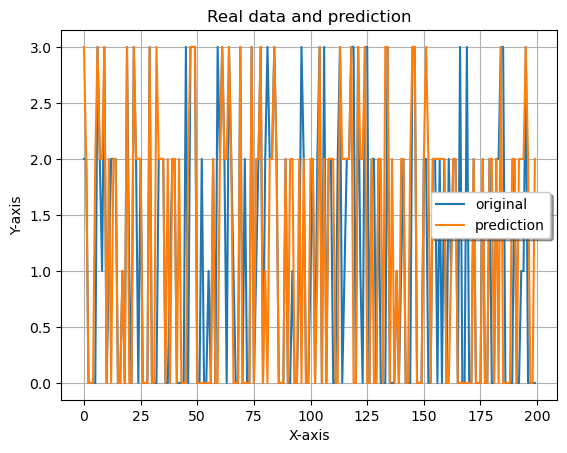

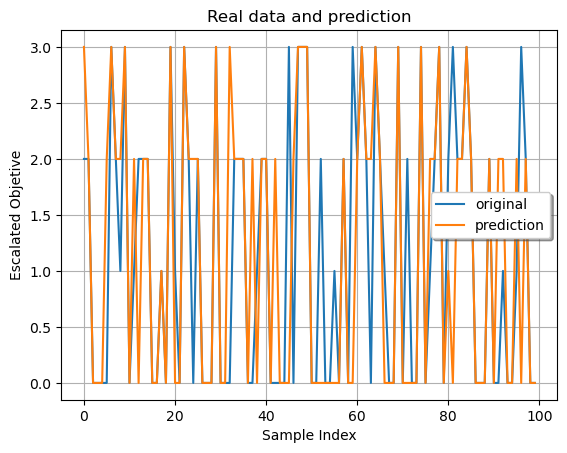

In [ ]:
graph_prediction(classifier=RegLog2)

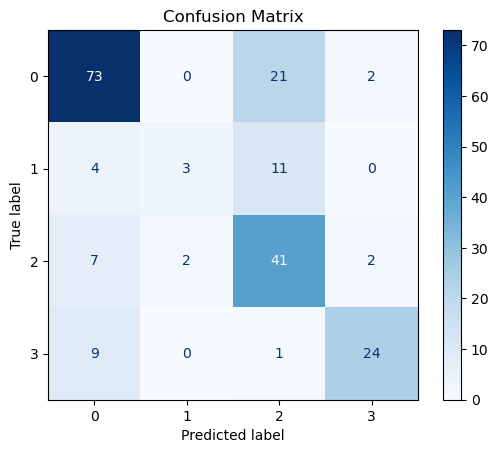

In [ ]:
model_evaluation(classifier=RegLog2)


Detailled Errors:
      Actual  Prediction  Error
3         2           0   True
10        2           0   True
17        0           2   True
22        2           0   True
26        0           2   True
..      ...         ...    ...
979       0           2   True
980       3           2   True
982       2           1   True
995       2           0   True
998       3           0   True

[292 rows x 3 columns]


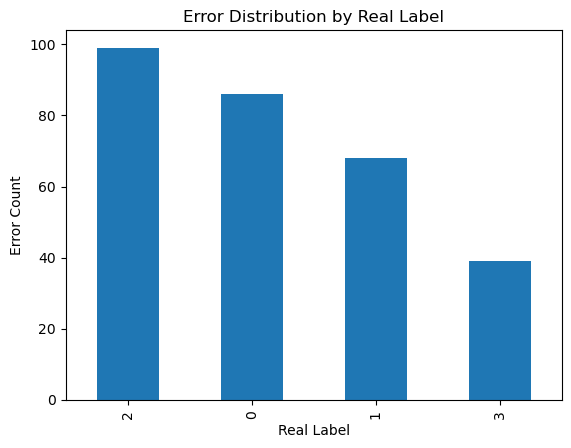

In [ ]:
model_errors(classifier=RegLog2)

### Error Analysis

In [ ]:
# Create a dataframe with real values and predictions
an_error = pd.DataFrame({'Real': ytest, 'Prediction': prediction})
an_error['Error'] = an_error['Real'] != an_error['Prediction']

# Filter the failed predictions
errores = an_error[an_error['Error']]

# Reset the index to correctly align the indexes
errores = errores.reset_index()

# Create a dataframe with the rows corresponding to the errors
errores_df = data.loc[errores['index']]

errores_df

,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
131,18.884312,-95.288699,6.197714,25.043547,2.961022,5.632680,34.033954,1436.519332,26.300006,79.690478,0.240012,0.147634,0.139903,0.095326,1.537077,4.939464,0.930254,0.222977,2
453,46.254175,-90.057318,37.991319,12.447433,8.237490,4.700299,14.413443,1851.614493,20.454155,35.114385,0.903872,0.202756,0.409346,0.090125,2.928241,3.003480,0.784891,0.098871,0
332,10.575740,-114.008168,62.360568,6.756668,4.958701,1.782703,24.214260,2832.337818,33.107647,55.296088,0.098113,0.443849,0.441786,0.257397,0.785287,3.345071,0.746460,0.169996,1
198,45.483457,-77.524372,56.931581,4.871903,4.987303,4.485008,9.418773,2804.087537,25.201991,74.283787,0.209447,0.246590,0.149954,0.175876,2.309988,1.808860,0.631736,0.097938,1
473,45.645725,-101.710177,73.603607,21.589908,4.198954,7.314087,43.602498,1586.974709,10.988587,36.558904,0.140889,0.219373,0.168504,0.170252,2.655629,1.278031,0.377988,0.388464,2
50,48.783385,-68.770883,48.538561,7.749322,9.409897,2.778003,23.108304,2646.932156,9.455916,85.528586,0.811814,0.016427,0.142493,0.464181,2.133580,4.481316,0.757584,0.572753,1
843,48.442813,-87.094229,95.338216,13.416947,1.387901,1.150044,3.843382,1447.599458,35.670232,76.819467,0.298661,0.336978,0.079070,0.084776,1.948514,2.462569,0.744965,0.341412,0
528,12.255020,-73.788187,5.842012,29.097321,6.149107,4.915131,16.441508,1957.401550,28.801612,99.110057,0.893191,0.279977,0.309969,0.276130,2.565898,3.109744,0.108481,0.883918,0
342,16.928075,-69.220925,12.617101,19.706957,8.384388,1.821932,29.293729,2112.203693,11.292923,87.474224,0.150641,0.194618,0.173895,0.157668,0.857912,2.090672,0.751717,0.792351,0
400,14.124955,-118.307066,37.357396,3.883166,2.109554,3.195958,30.789408,290.242218,22.466266,74.954193,0.180071,0.077901,0.373150,0.494094,0.595384,3.491317,0.581937,0.703986,1


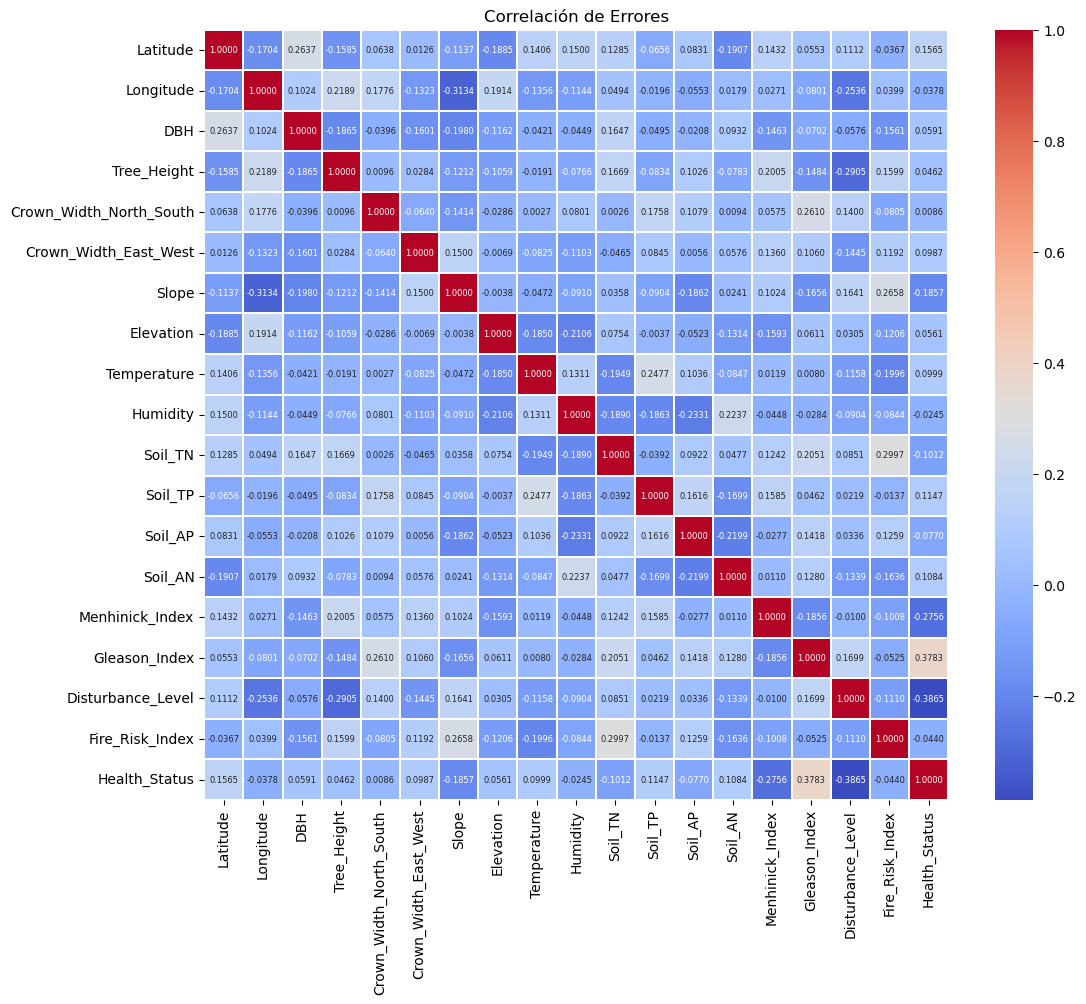

In [ ]:
# Error correlation matrix
correlation_matrix = errores_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.1, fmt=".4f", annot_kws={"size": 6})
plt.title('Correlación de Errores')
plt.show()

#### Individual Plots

In [ ]:
def disperse_errors(dataframe):
    variables = dataframe.columns
    for variable in variables:
        plt.figure(figsize=(10, 6))
        plt.plot(dataframe.index, dataframe[variable], marker='o', linestyle='None', color='b')
        plt.title(f'Dispersion of {variable}')
        plt.xlabel('Index')
        plt.ylabel(variable)
        plt.grid(True)
        plt.show()


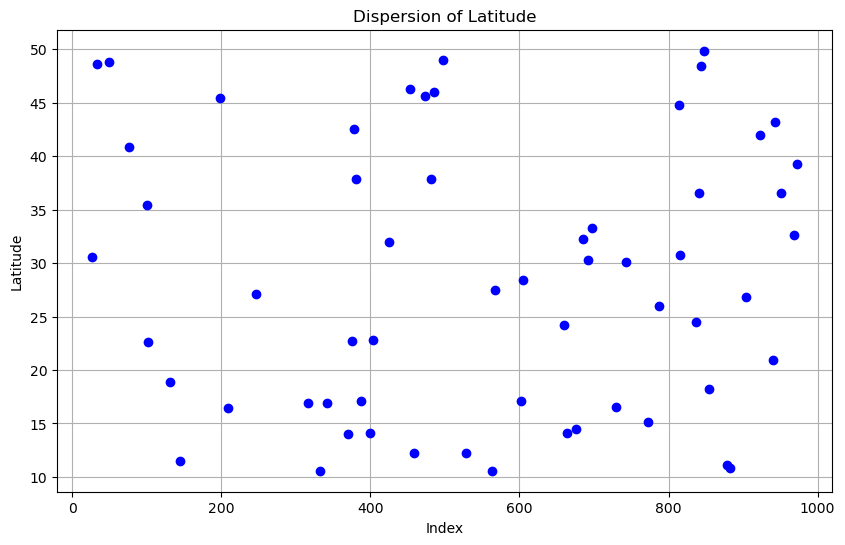

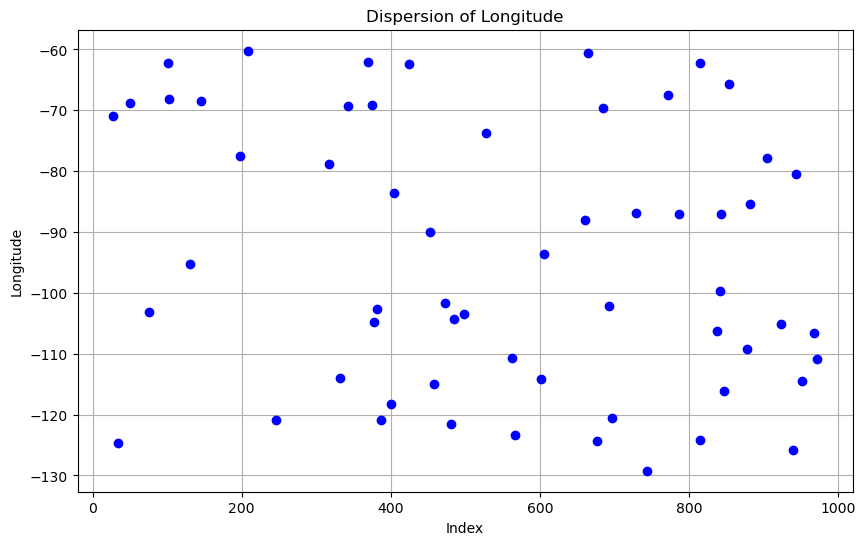

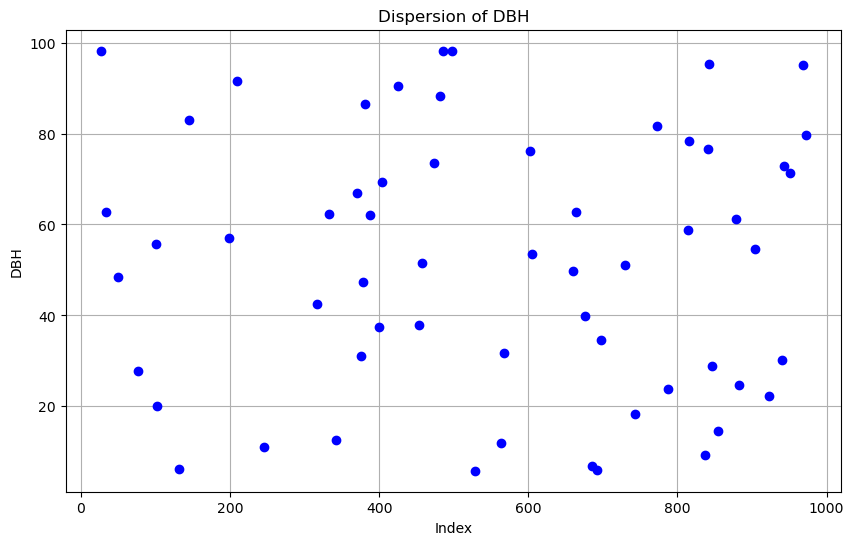

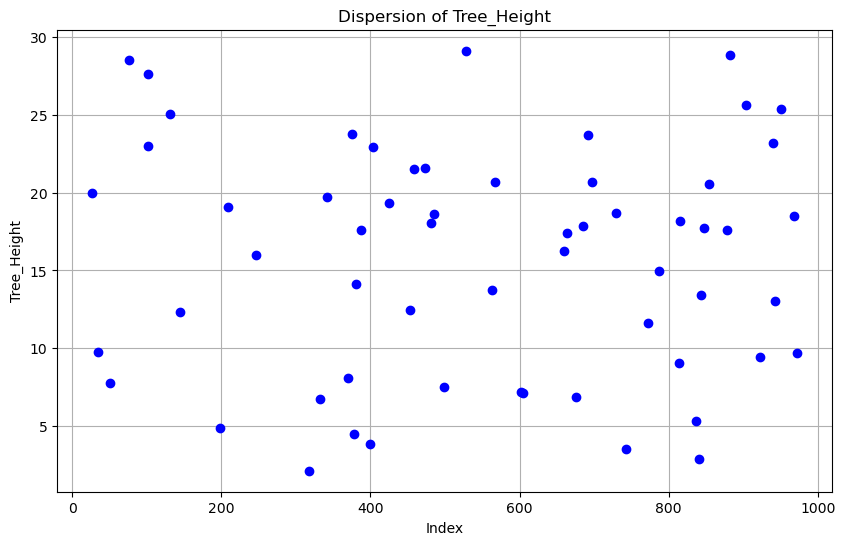

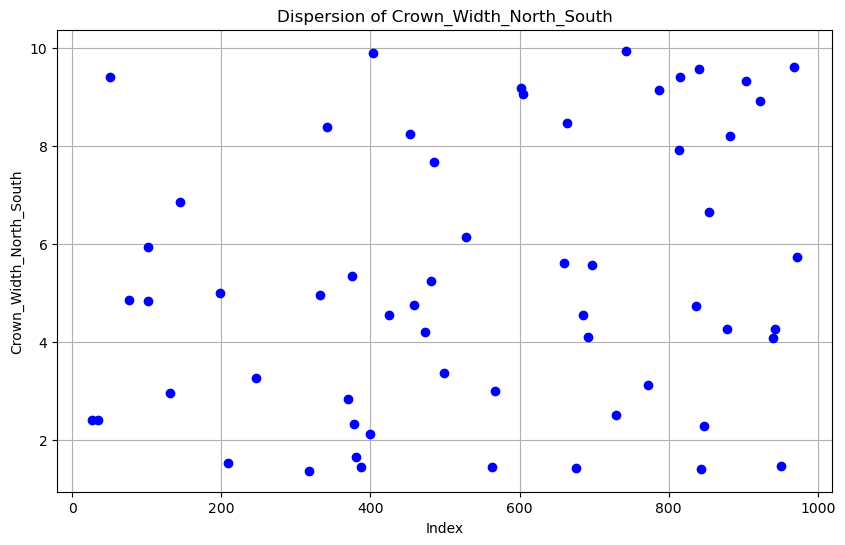

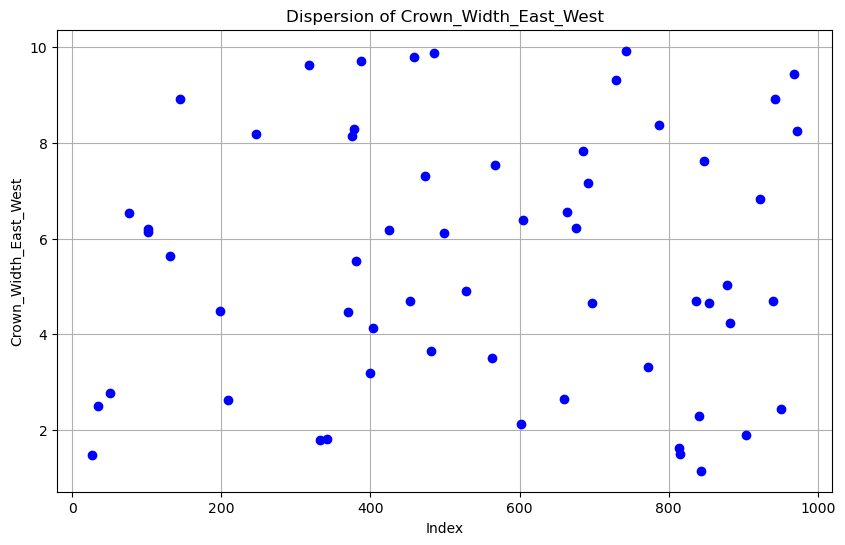

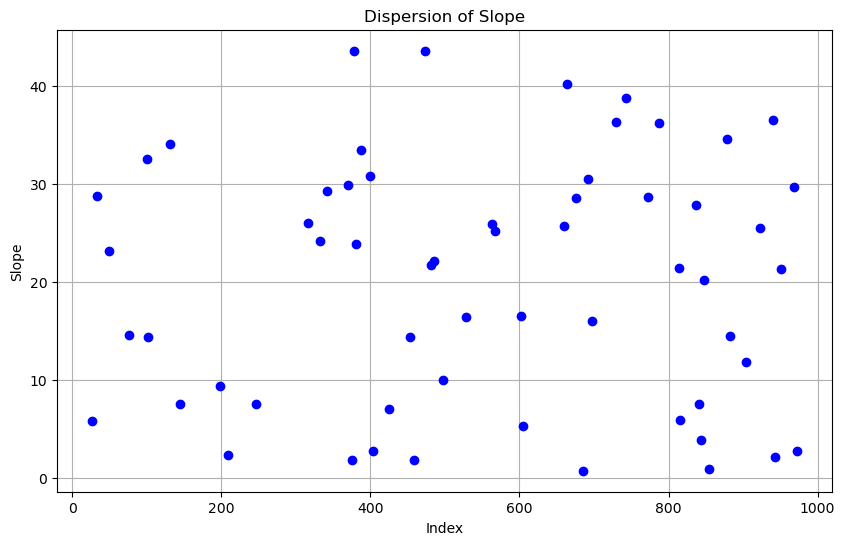

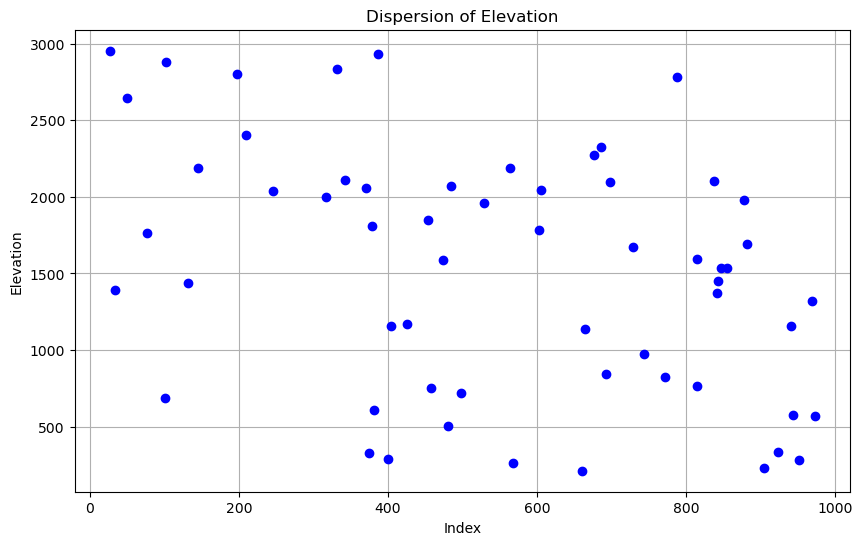

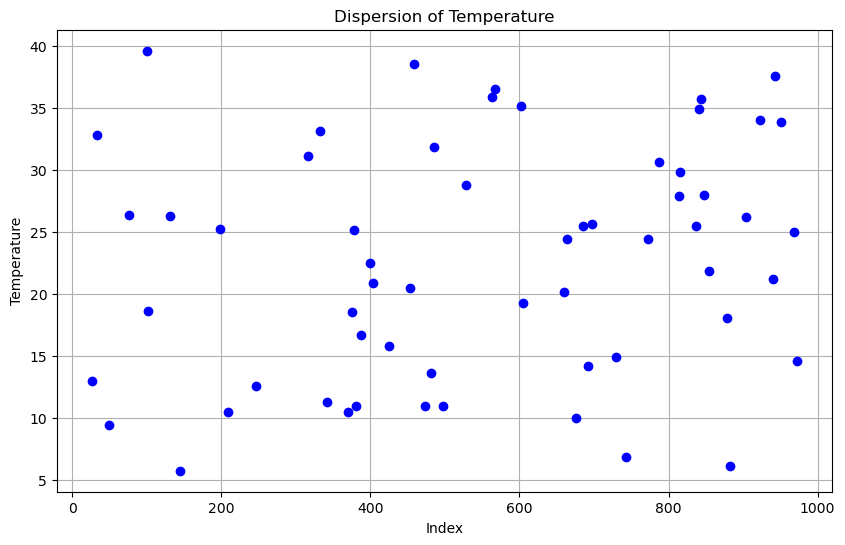

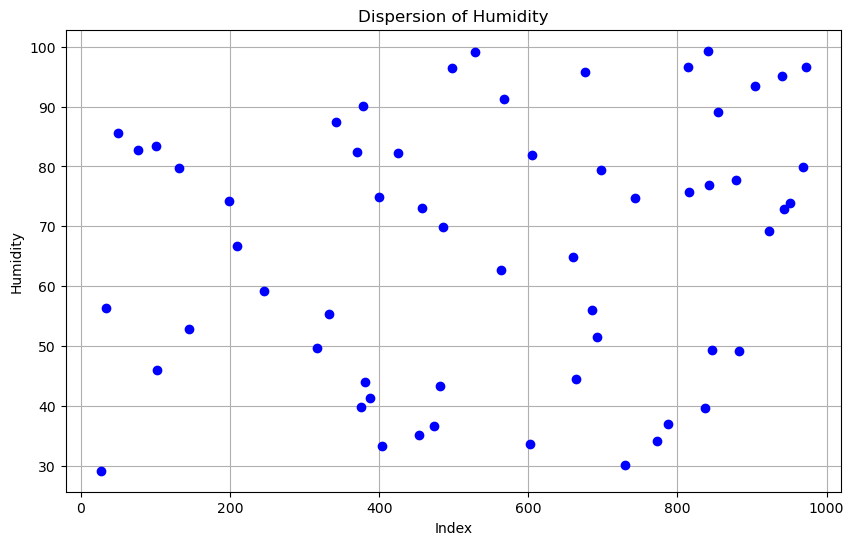

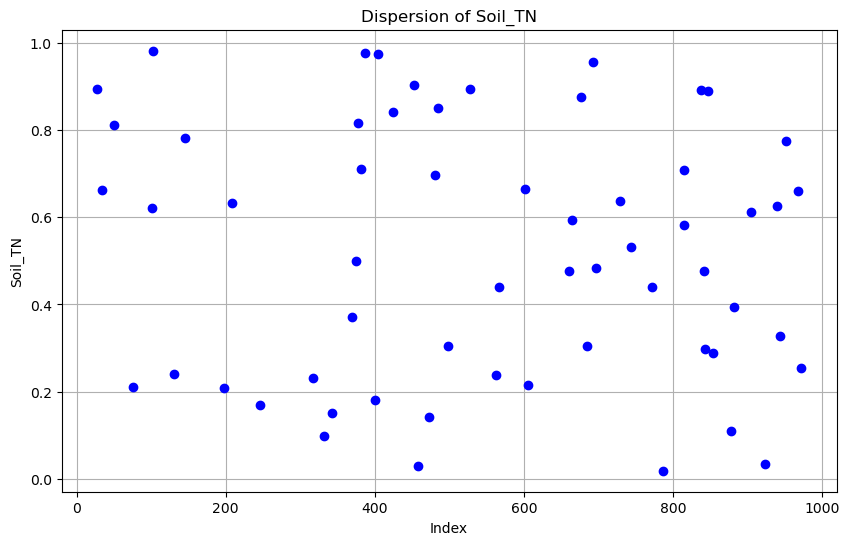

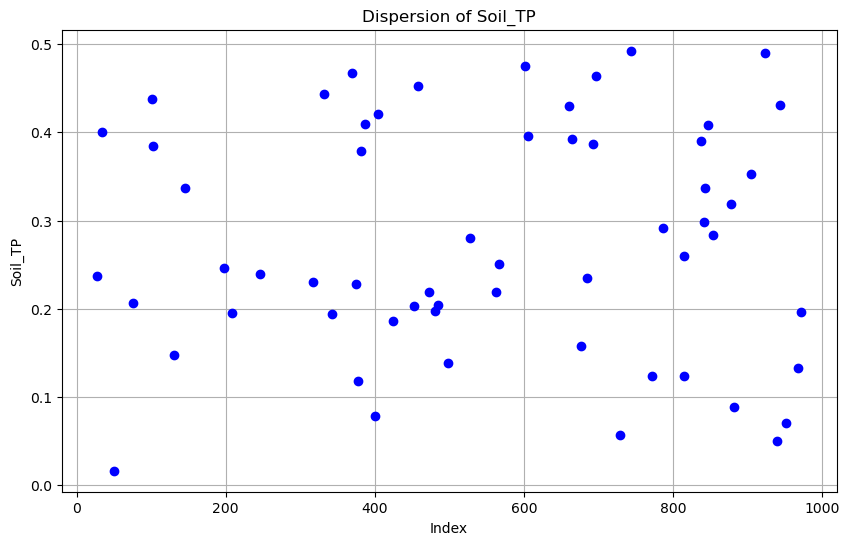

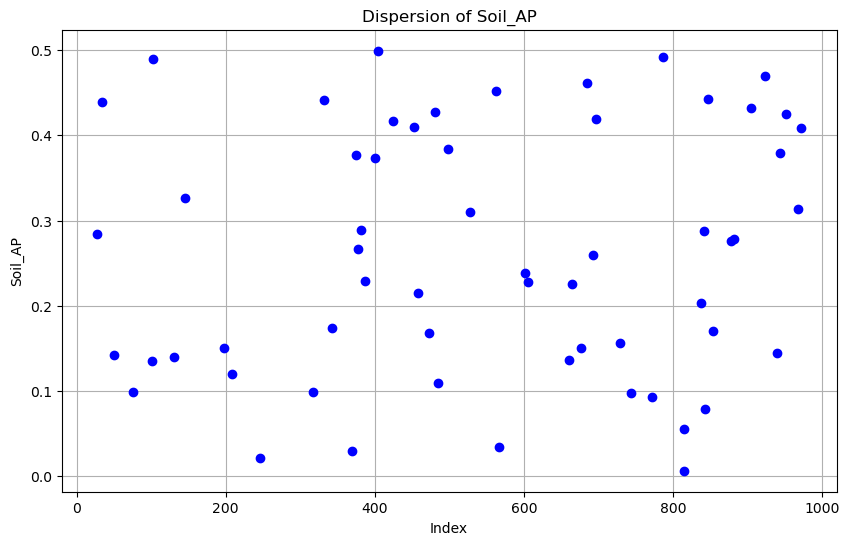

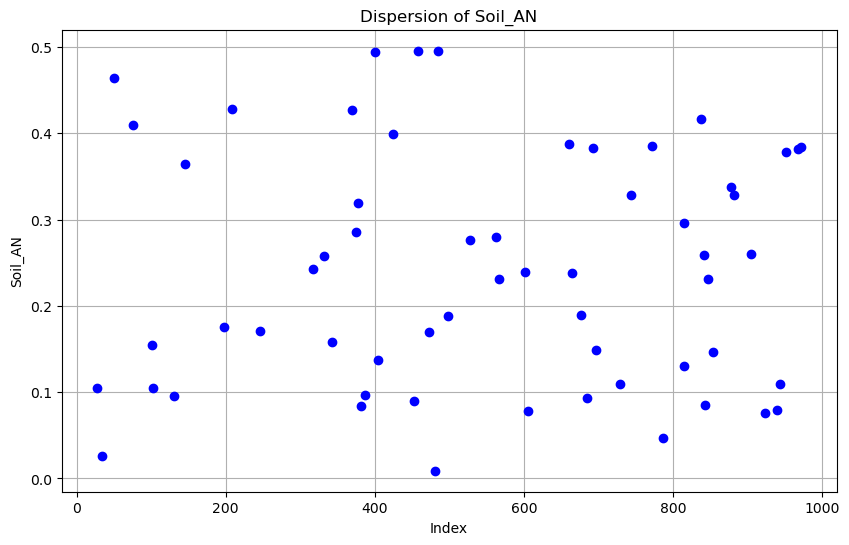

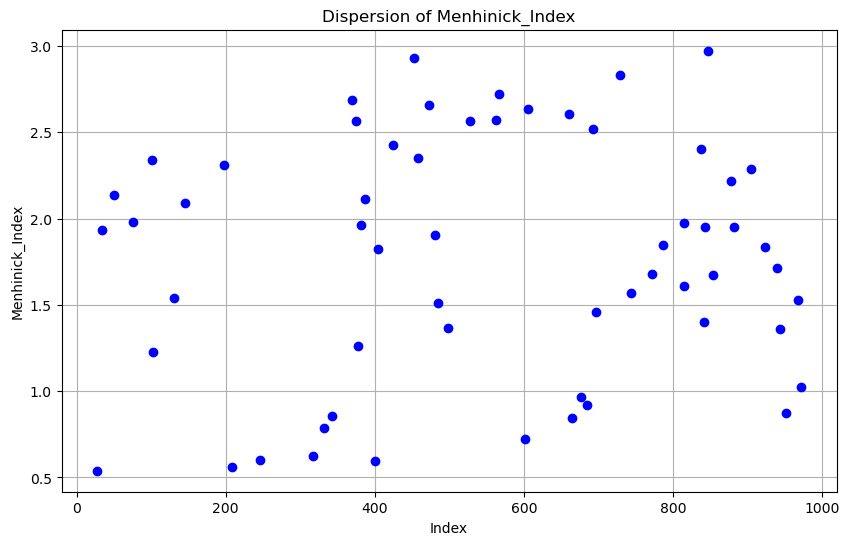

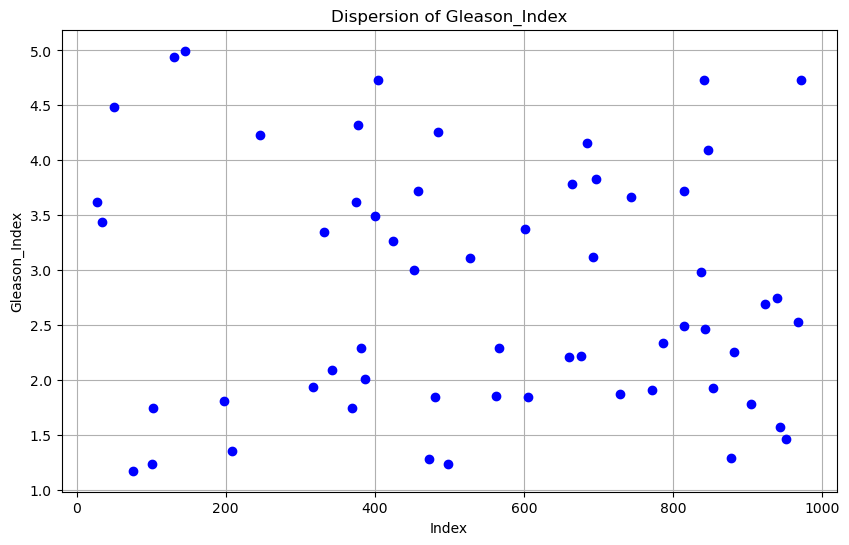

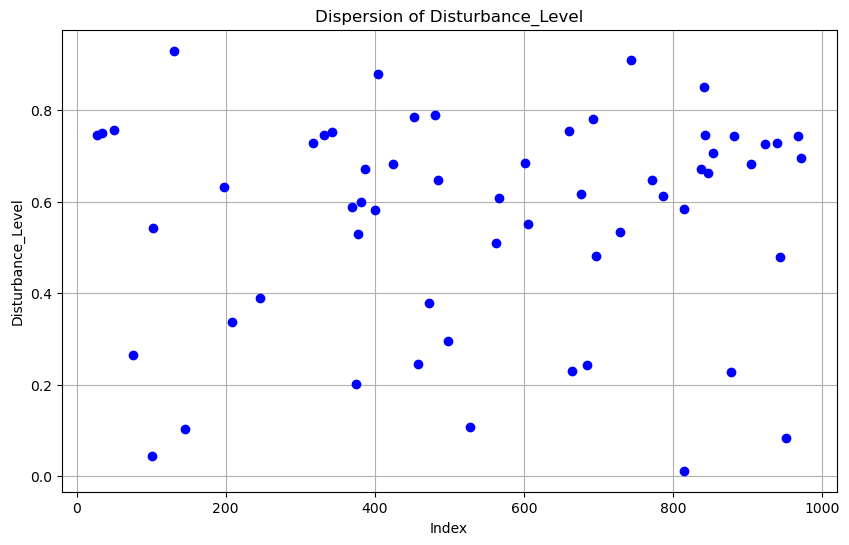

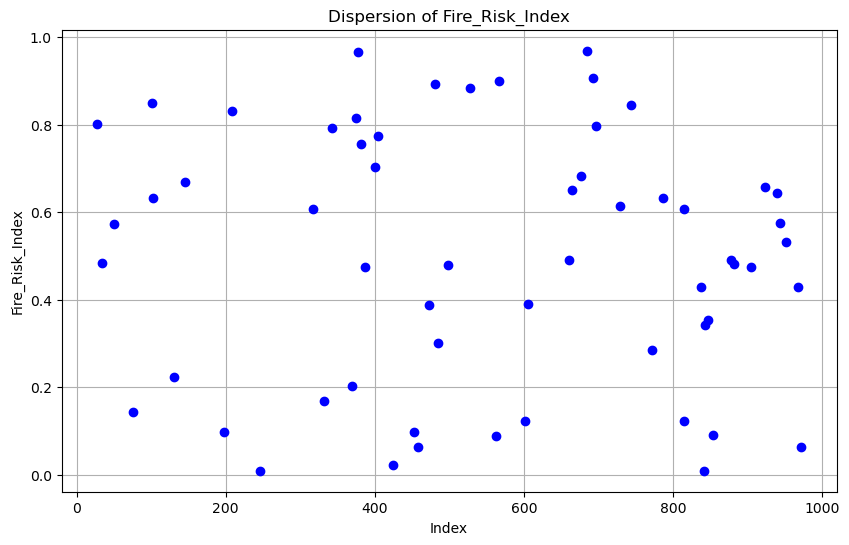

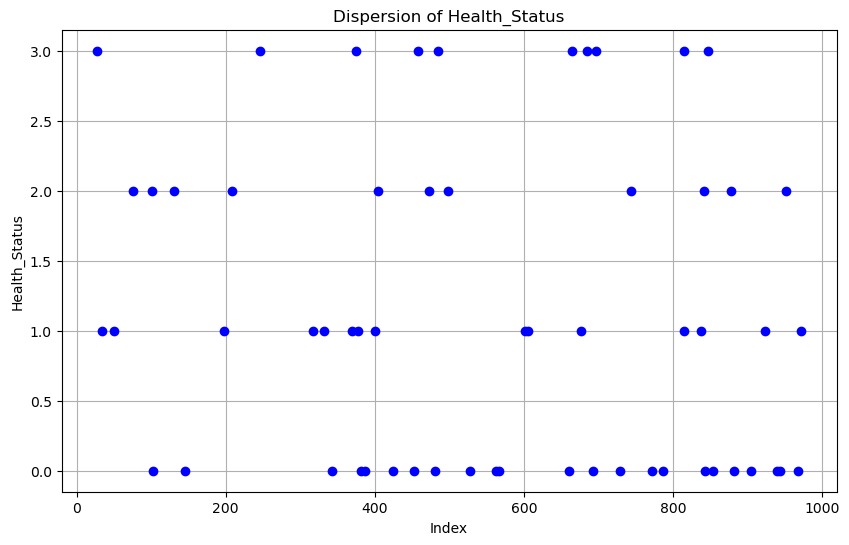

In [ ]:
disperse_errors(errores_df)

#### KMeans

I am going to try a simple Kmeans in a try to identify any pattern the errors may follow. I will not use Health Status, since it does not have any value keeping it, what I want to try is if there is any pattern in the variables that lead to error.

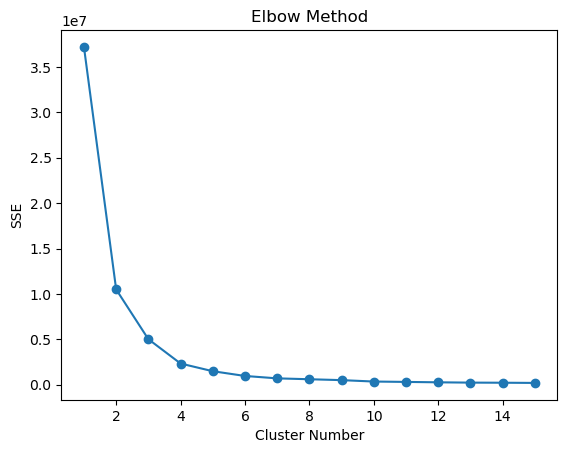

In [ ]:
Xkm = errores_df.drop(columns=['Health_Status'])

# Generate a list of SSE for different values of K
sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xkm)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 16), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('SSE')
plt.show()

In [ ]:
# k = 3
kmeans = KMeans(n_clusters=3, random_state=42)

# Predict
y_kmeans = kmeans.fit_predict(Xkm)
y_kmeans

array([2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 1, 2, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 2, 2, 1])

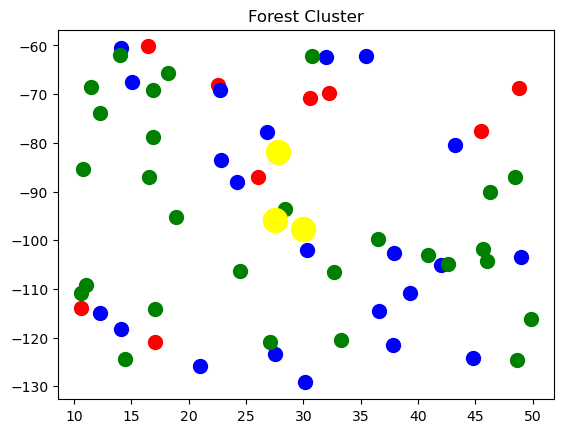

In [ ]:
# Add it to the dataset as a new column
errores_df['cluster'] = y_kmeans

# Visualize the clusters
plt.scatter(Xkm[y_kmeans==0].iloc[:, 0], Xkm[y_kmeans==0].iloc[:, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(Xkm[y_kmeans==1].iloc[:, 0], Xkm[y_kmeans==1].iloc[:, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(Xkm[y_kmeans==2].iloc[:, 0], Xkm[y_kmeans==2].iloc[:, 1], s=100, c='green', label ='Cluster 3')
# Plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Forest Cluster')
plt.show()

## KNN

In [ ]:
# Parameters
param_knn = Results.iloc[3, 3]

print(param_knn)

{'metric': 'manhattan', 'n_neighbors': 17, 'p': 2, 'weights': 'distance'}


In [ ]:
knn2 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 17, p= 2, weights= 'distance')

# Train
knn2.fit(xtrain,ytrain)

# Predict
prediction = knn2.predict(xtest)

In [ ]:
model_metrics(classifier=knn2, model_name='KNN Tuned')

Accuracy :  66.50%
Precision :  67.78%
Recall :  66.50%
F1 Score :  64.06%
Cross Validation Score :  64.38%


array([2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 0, 3, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 0, 2,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 3, 0, 2, 0, 2, 1, 0, 2, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 1, 0, 2, 3, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 3, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 3, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

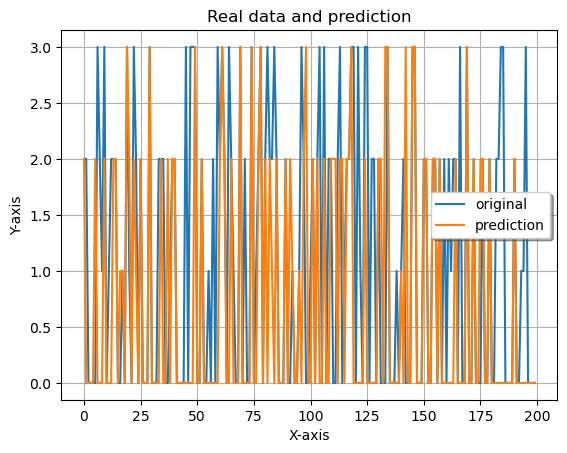

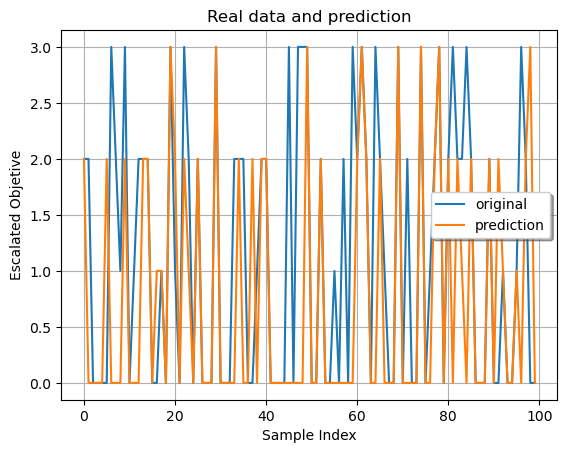

In [ ]:
graph_prediction(classifier=knn2)

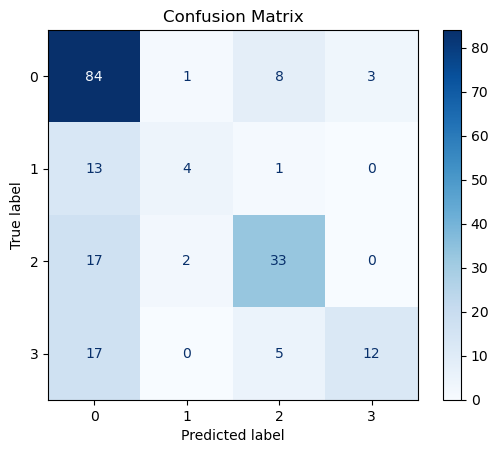

In [ ]:
model_evaluation(classifier=knn2)


Detailled Errors:
      Actual  Prediction  Error
3         2           0   True
10        2           0   True
13        2           0   True
14        3           0   True
17        0           2   True
..      ...         ...    ...
984       0           3   True
989       2           0   True
994       3           0   True
995       2           0   True
998       3           0   True

[343 rows x 3 columns]


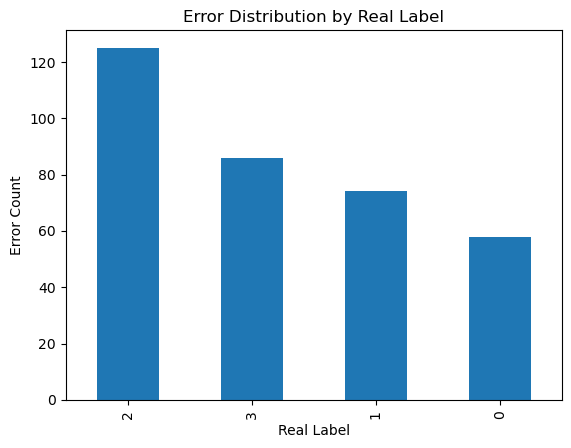

In [ ]:
model_errors(classifier=knn2)

### Analisis de errores

In [ ]:
# Create a dataframe with real values and predictions
an_error = pd.DataFrame({'Real': ytest, 'Prediction': prediction})
an_error['Error'] = an_error['Real'] != an_error['Prediction']

# Filter the failed predictions
errores = an_error[an_error['Error']]

# Reset the index to correctly align the indexes
errores = errores.reset_index()

# Create a dataframe with the rows corresponding to the errors
errores_df = data.loc[errores['index']]

errores_df

,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
43,46.372816,-86.187604,15.903043,13.300828,6.574510,7.000171,7.238713,536.771764,29.677215,40.546526,0.562553,0.357635,0.229383,0.420614,0.684046,3.566746,0.863187,0.718704,2
453,46.254175,-90.057318,37.991319,12.447433,8.237490,4.700299,14.413443,1851.614493,20.454155,35.114385,0.903872,0.202756,0.409346,0.090125,2.928241,3.003480,0.784891,0.098871,0
259,13.887060,-89.262002,46.286616,27.078894,4.606338,8.899745,9.695831,1388.991936,32.773809,30.376501,0.093162,0.140945,0.412609,0.097275,0.704922,3.566948,0.719288,0.751154,3
60,25.547092,-68.842602,10.915945,10.324142,3.646607,9.395809,18.158400,2835.599324,27.112120,93.799912,0.265577,0.378714,0.476389,0.399292,2.426223,1.067451,0.362617,0.224210,2
332,10.575740,-114.008168,62.360568,6.756668,4.958701,1.782703,24.214260,2832.337818,33.107647,55.296088,0.098113,0.443849,0.441786,0.257397,0.785287,3.345071,0.746460,0.169996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,21.197356,-114.655021,34.390408,18.343980,5.331502,9.989136,16.174072,2138.312688,20.443038,54.298011,0.038345,0.028115,0.295747,0.226453,1.955926,4.570046,0.773261,0.029772,3
246,27.127366,-120.812859,11.045886,16.003157,3.257912,8.180242,7.505430,2038.785416,12.564753,59.135721,0.168473,0.239814,0.021421,0.171359,0.600612,4.232059,0.390113,0.009772,3
317,16.931773,-78.788733,42.484727,2.148777,1.362570,9.629847,25.973400,1999.230657,31.136016,49.591090,0.231259,0.230205,0.098146,0.242418,0.622104,1.932589,0.729038,0.608491,1
605,28.431151,-93.665815,53.557268,7.119458,9.072958,6.379141,5.253656,2043.736531,19.280703,81.914890,0.215672,0.395400,0.228326,0.078238,2.632311,1.840212,0.551680,0.391602,1


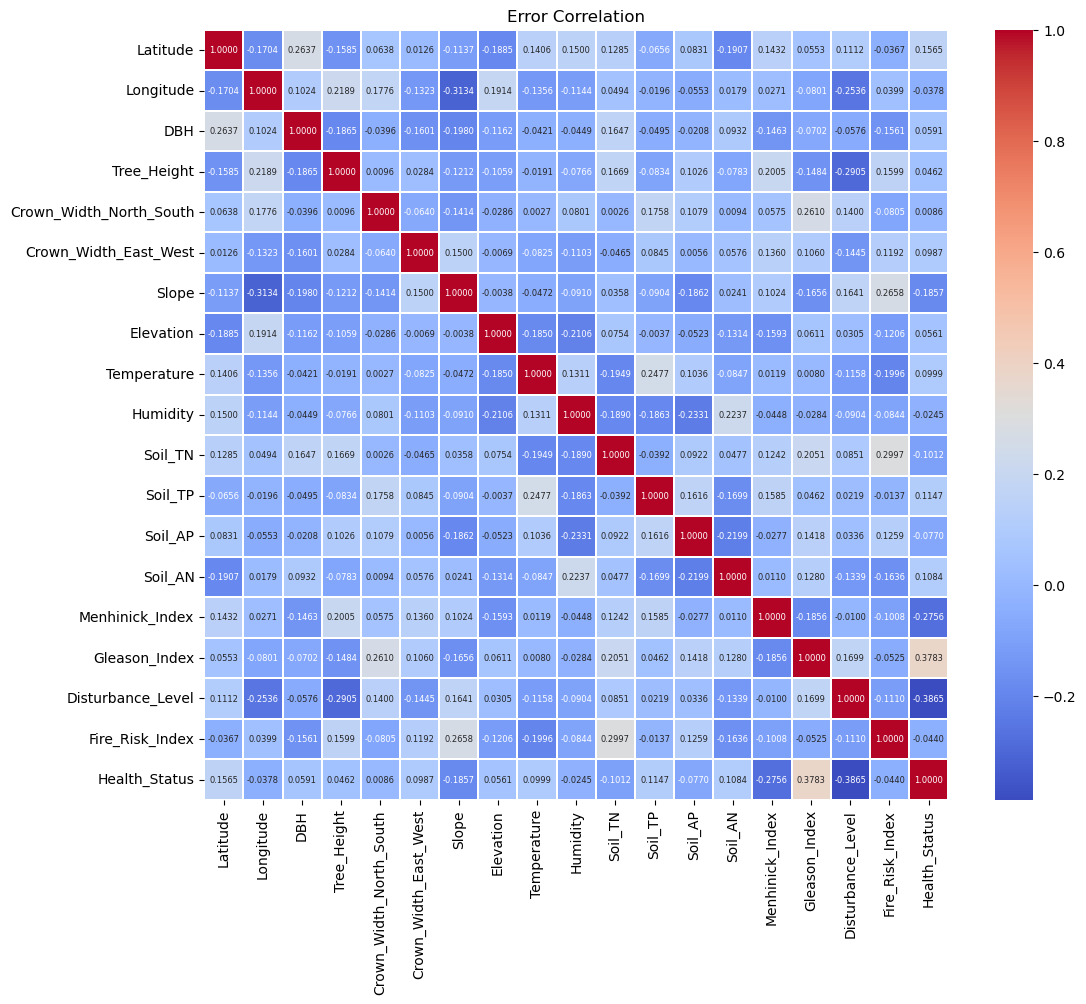

In [ ]:
# Error correlation matrix
correlation_matrix = errores_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.1, fmt=".4f", annot_kws={"size": 6})
plt.title('Error Correlation')
plt.show()

#### Individual Plots

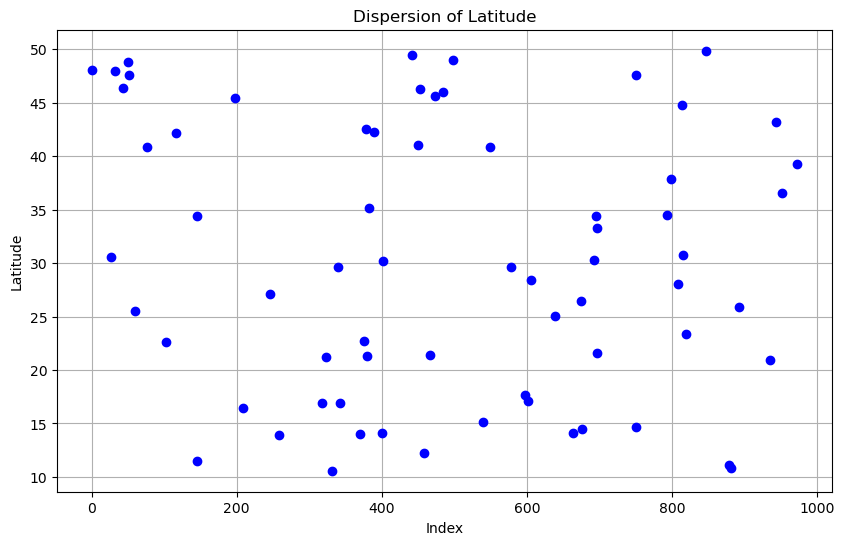

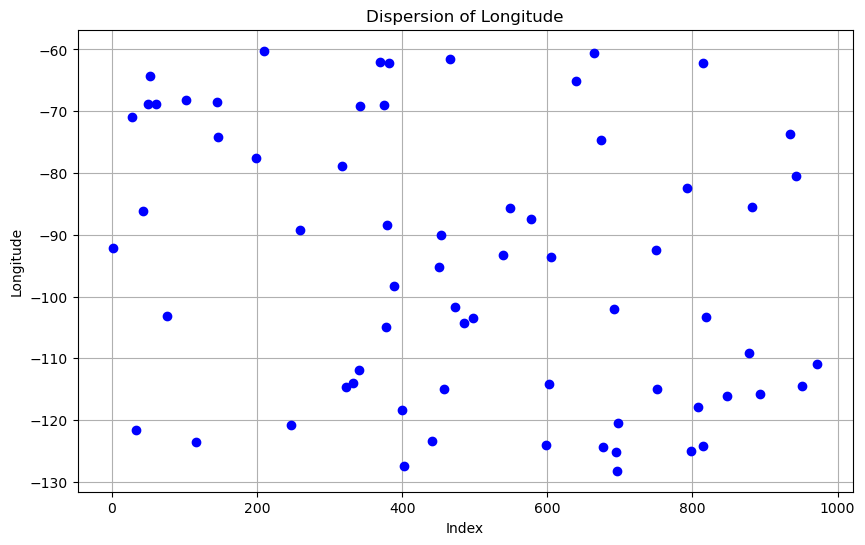

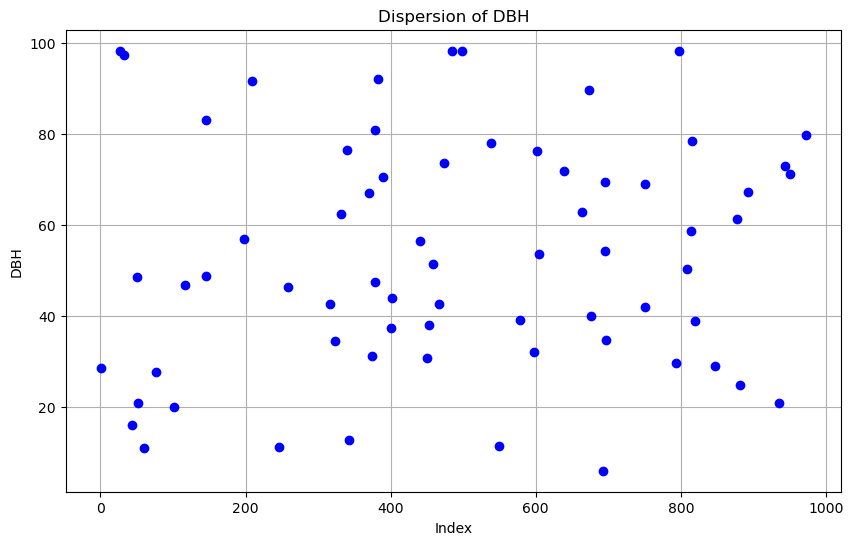

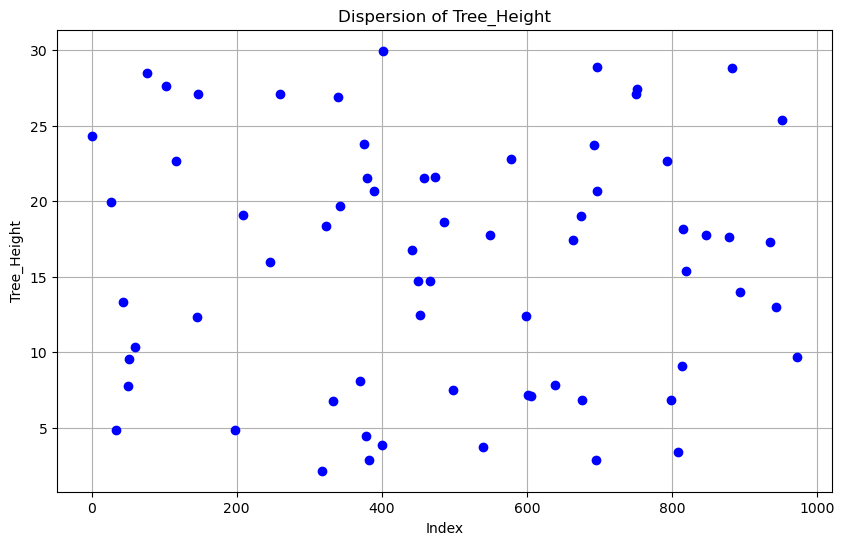

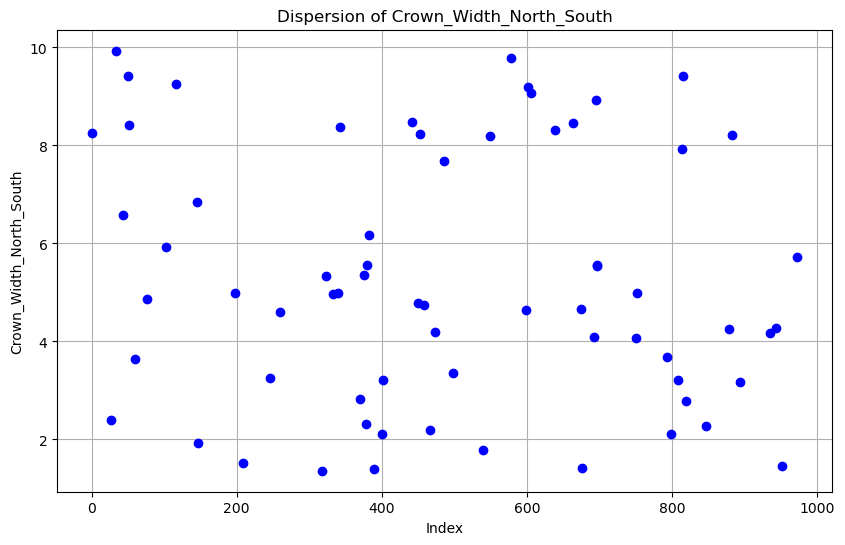

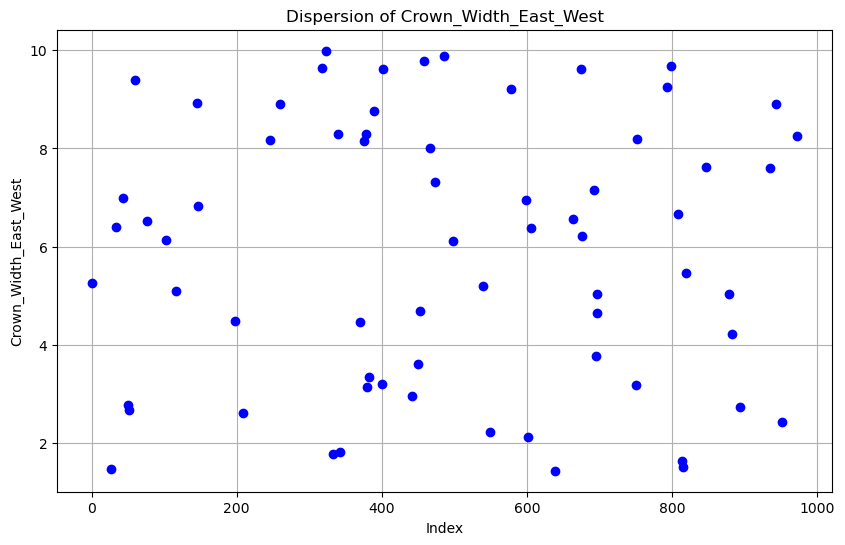

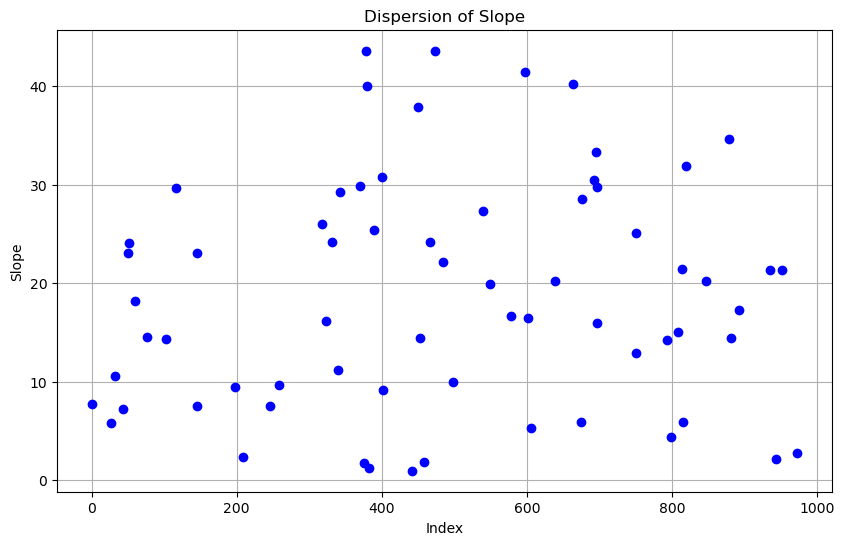

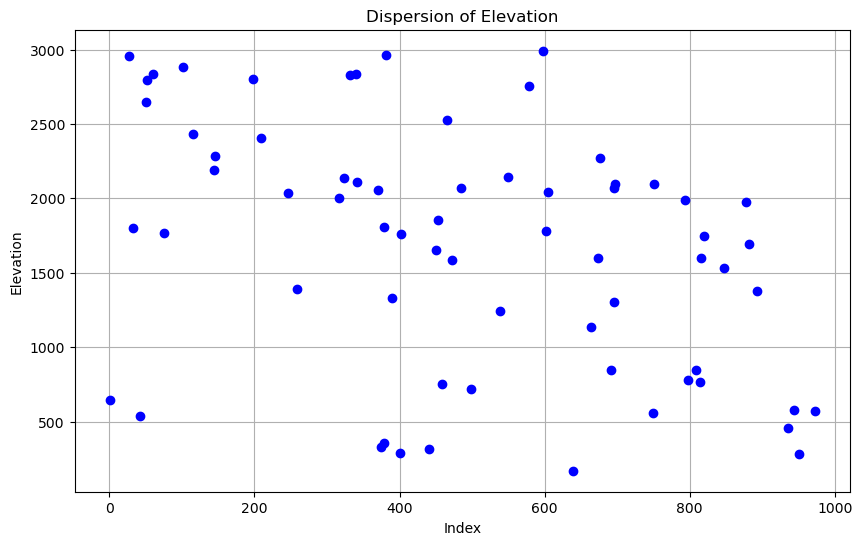

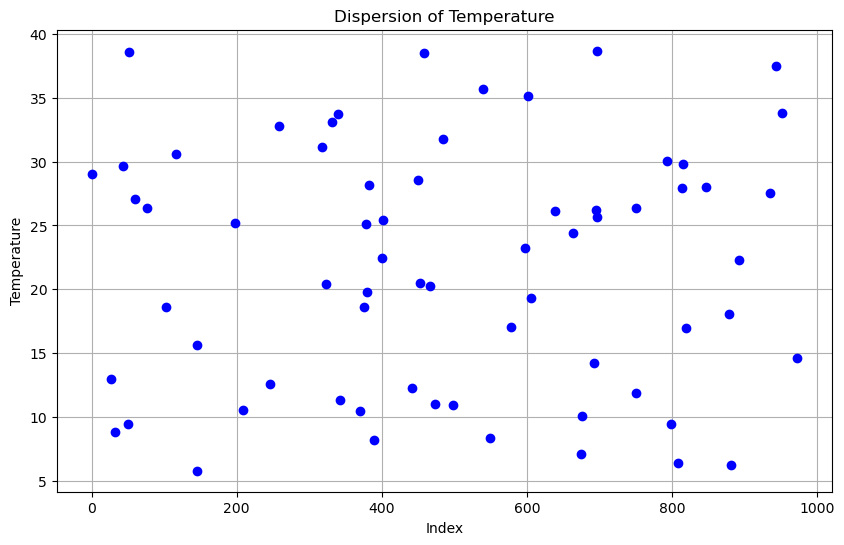

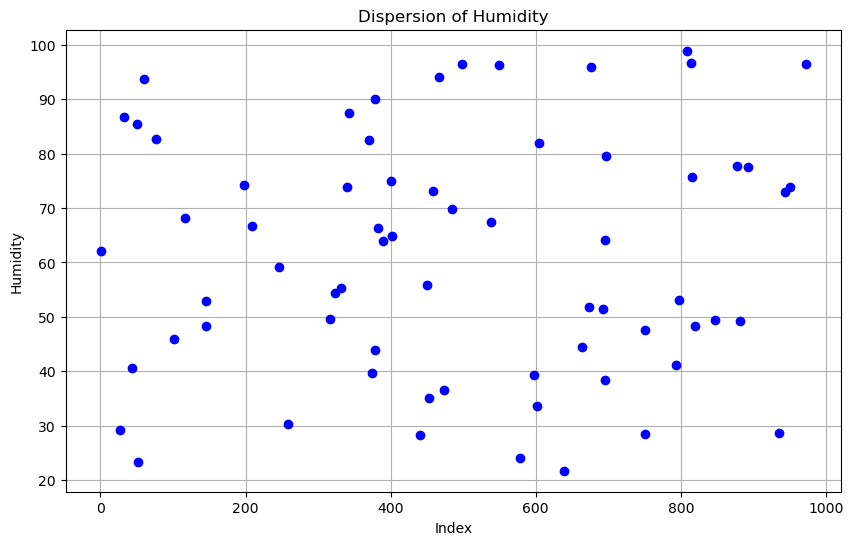

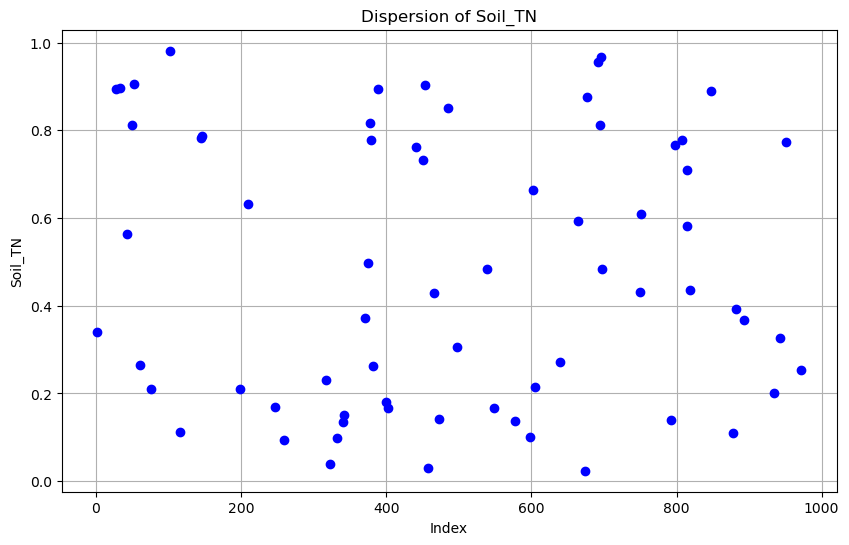

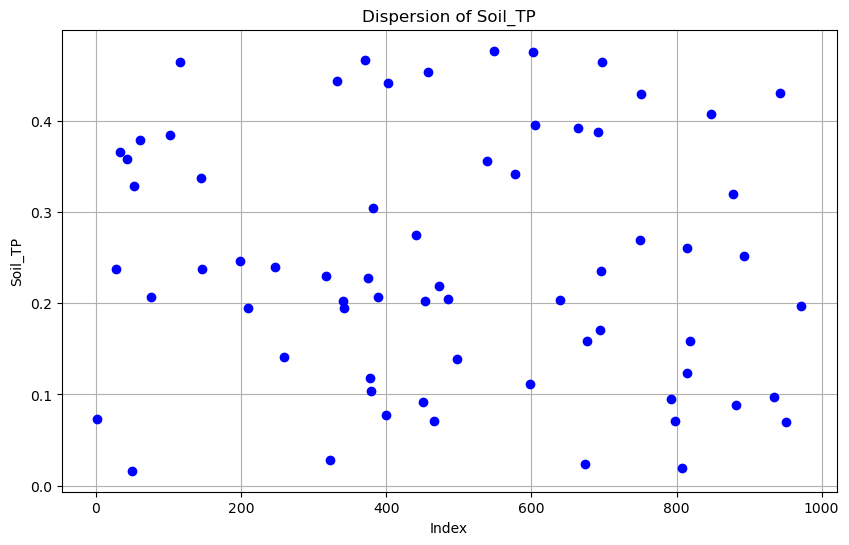

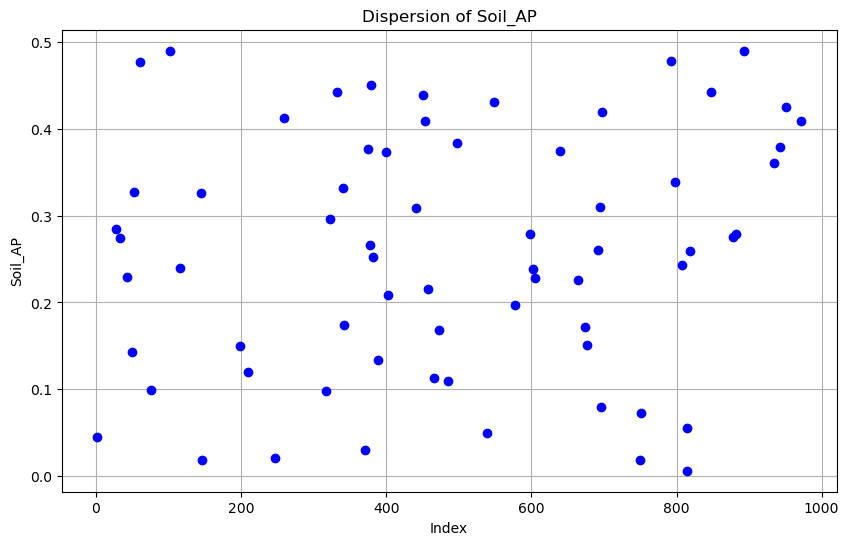

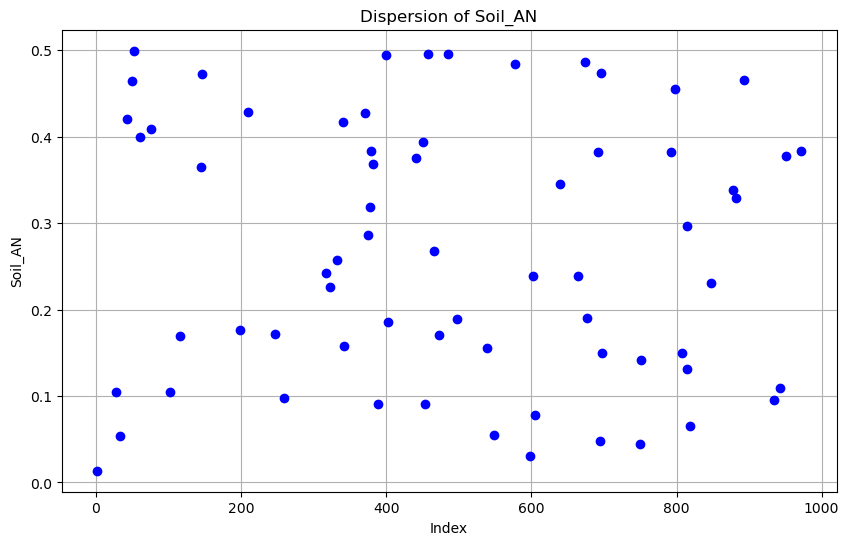

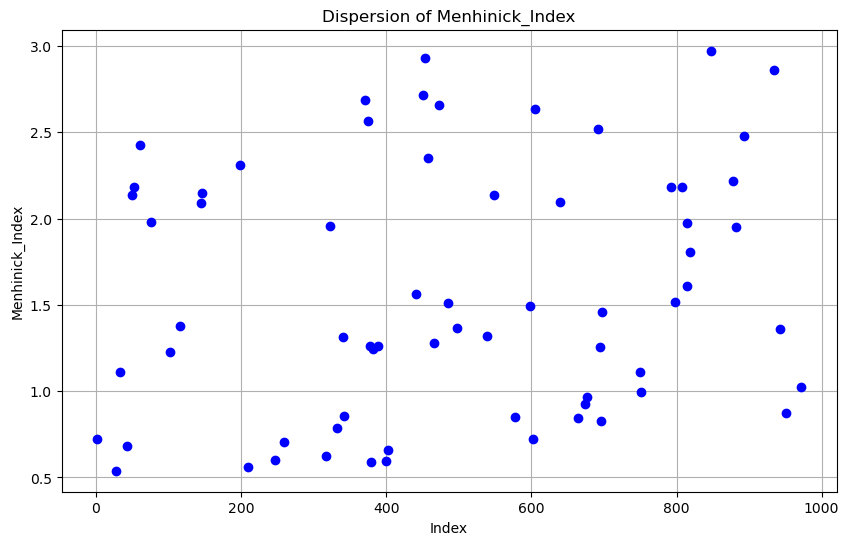

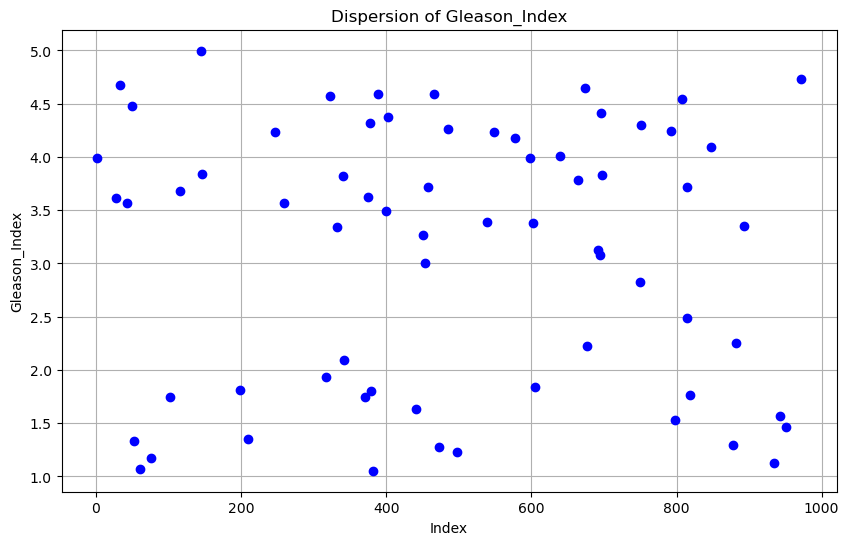

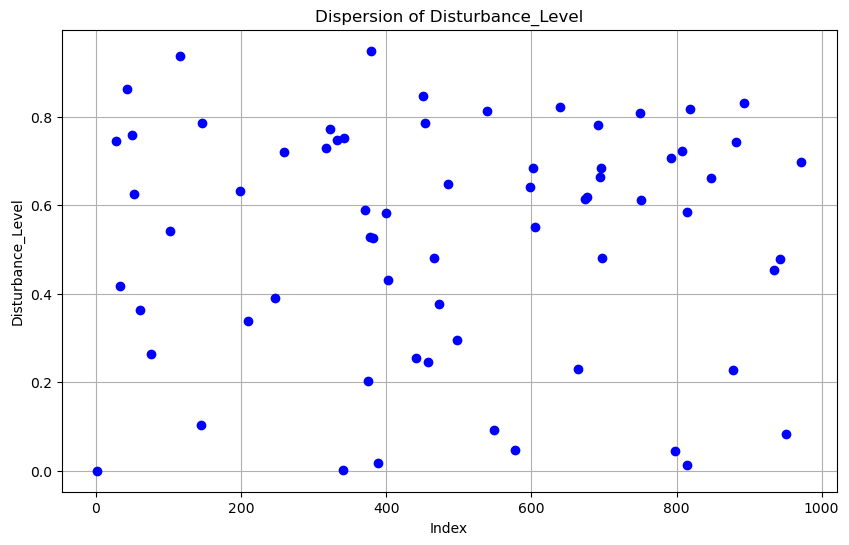

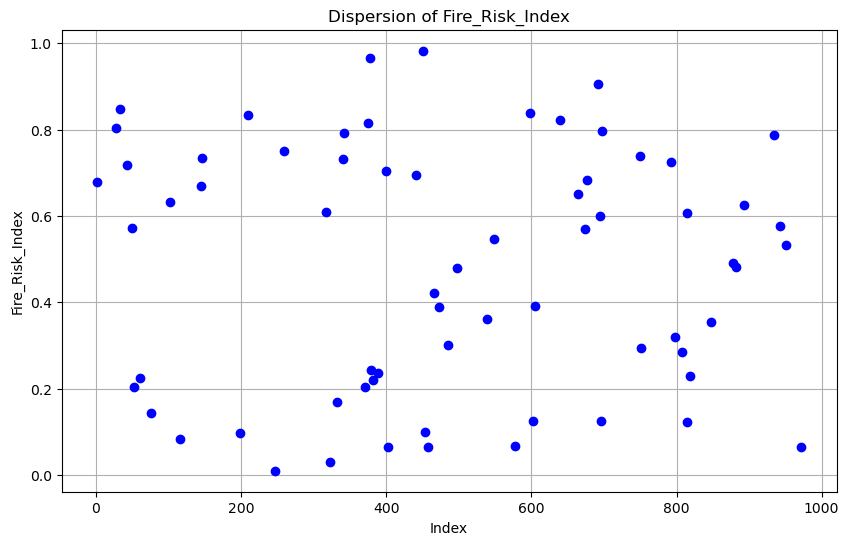

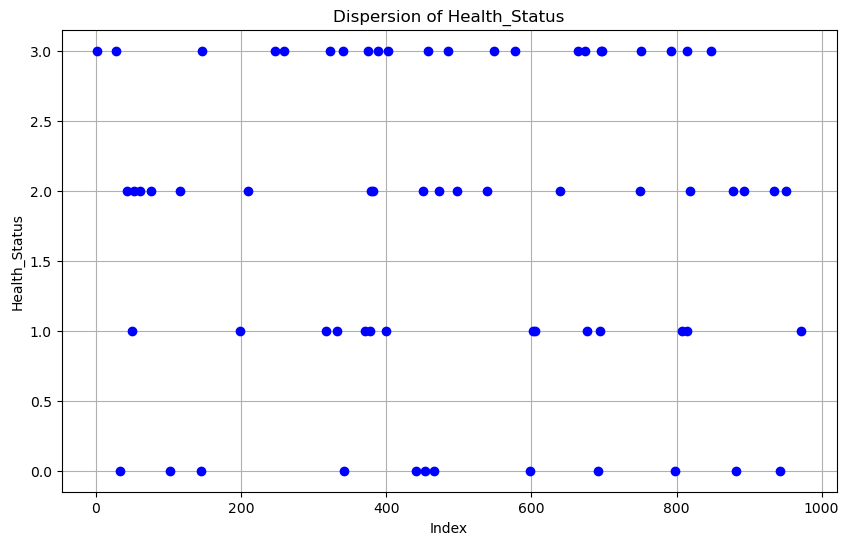

In [ ]:
disperse_errors(errores_df)

#### KMeans

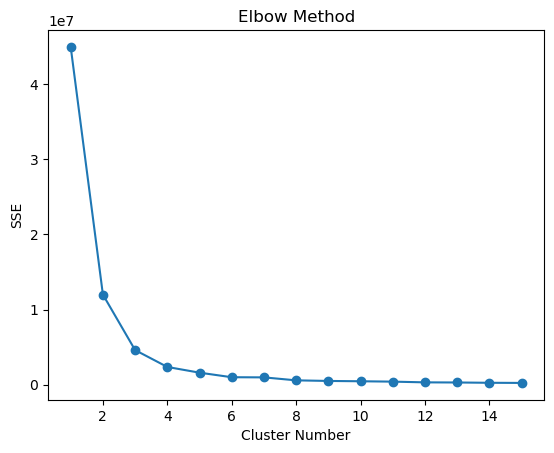

In [ ]:
Xkm = errores_df.drop(columns=['Health_Status'])

# Generate a list of SSE for different values of K
sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xkm)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 16), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('SSE')
plt.show()

In [ ]:
# k = 3
kmeans = KMeans(n_clusters=3, random_state=42)

# Predict
y_kmeans = kmeans.fit_predict(Xkm)
y_kmeans

array([1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1,
       2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0,
       1])

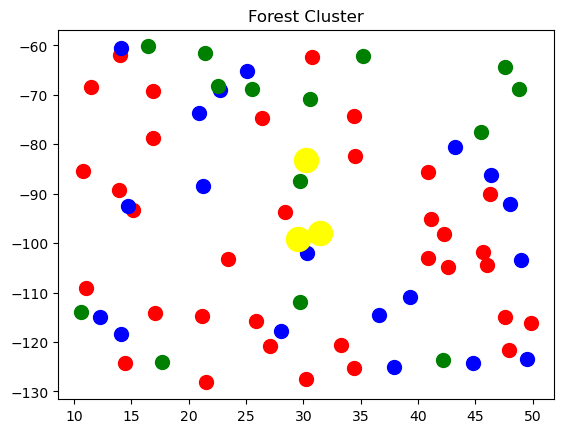

In [ ]:
# Add it to the dataframe as a new column
errores_df['cluster'] = y_kmeans

# Visualize the clusters
plt.scatter(Xkm[y_kmeans==0].iloc[:, 0], Xkm[y_kmeans==0].iloc[:, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(Xkm[y_kmeans==1].iloc[:, 0], Xkm[y_kmeans==1].iloc[:, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(Xkm[y_kmeans==2].iloc[:, 0], Xkm[y_kmeans==2].iloc[:, 1], s=100, c='green', label ='Cluster 3')
# Plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Forest Cluster')
plt.show()

## Naive Bayes

In [ ]:
# Parameters
param_gnb = Results.iloc[4, 1]

print(param_gnb)

{'var_smoothing': 1e-09}


In [ ]:
gnb2 = GaussianNB(var_smoothing= 1e-09)

# Train
gnb2.fit(xtrain,ytrain)

# Predict
prediction = gnb2.predict(xtest)

In [ ]:
model_metrics(classifier=gnb2, model_name='Naive Bayes Tuned')

Accuracy :  82.00%
Precision :  83.04%
Recall :  82.00%
F1 Score :  82.29%
Cross Validation Score :  77.50%


array([3, 2, 0, 0, 0, 2, 2, 2, 1, 3, 0, 1, 0, 2, 2, 0, 0, 1, 0, 3, 1, 0,
       3, 1, 2, 2, 0, 0, 0, 3, 0, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 0, 0,
       0, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 3, 2, 2, 3, 2,
       1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 1, 2, 3, 0, 2, 3, 2, 1, 3, 2, 0, 0,
       0, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 1, 2, 0, 2, 3, 0, 2, 0, 2, 2,
       2, 0, 0, 3, 0, 1, 2, 2, 3, 0, 0, 3, 1, 2, 3, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 3, 0, 0, 0, 1, 0, 1, 2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 3, 2, 0,
       2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 2, 0, 2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 2, 0,
       0, 2])

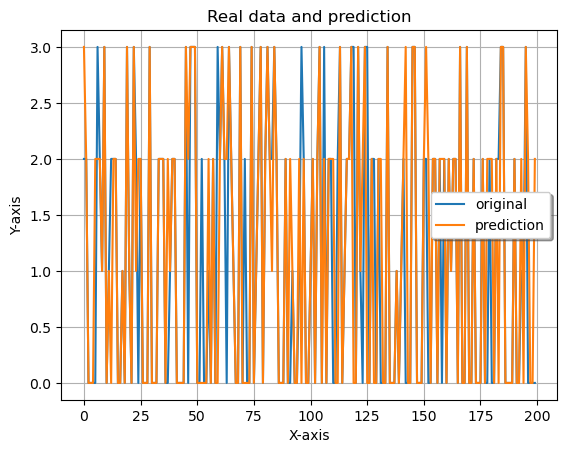

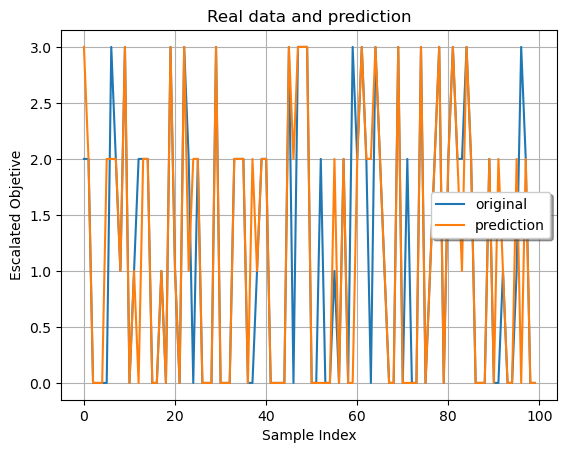

In [ ]:
graph_prediction(classifier=gnb2)

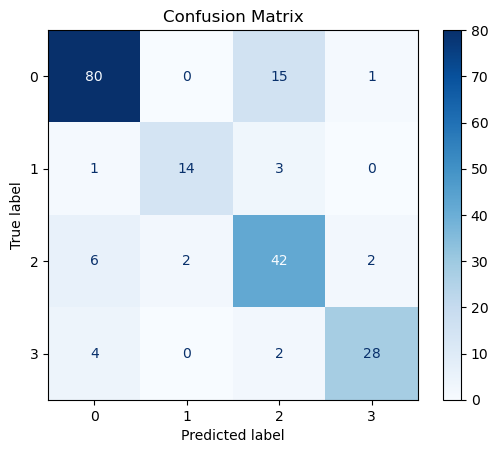

In [ ]:
model_evaluation(classifier=gnb2)


Detailled Errors:
      Actual  Prediction  Error
3         2           0   True
10        2           0   True
17        0           2   True
21        0           2   True
22        2           0   True
..      ...         ...    ...
972       1           2   True
979       0           2   True
994       3           0   True
995       2           0   True
998       3           2   True

[229 rows x 3 columns]


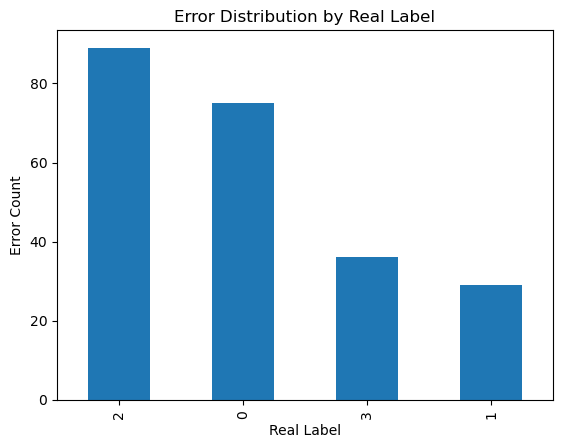

In [ ]:
model_errors(classifier=gnb2)

### Error Analysis

In [ ]:
# Create a dataframe with real values and predictions
an_error = pd.DataFrame({'Real': ytest, 'Prediction': prediction})
an_error['Error'] = an_error['Real'] != an_error['Prediction']

# Filter the failed predictions
errores = an_error[an_error['Error']]

# Reset the index to correctly align the indexes
errores = errores.reset_index()

# Create a dataframe with the rows corresponding to the errors
errores_df = data.loc[errores['index']]

errores_df

,Latitude,Longitude,DBH,Tree_Height,Crown_Width_North_South,Crown_Width_East_West,Slope,Elevation,Temperature,Humidity,Soil_TN,Soil_TP,Soil_AP,Soil_AN,Menhinick_Index,Gleason_Index,Disturbance_Level,Fire_Risk_Index,Health_Status
131,18.884312,-95.288699,6.197714,25.043547,2.961022,5.632680,34.033954,1436.519332,26.300006,79.690478,0.240012,0.147634,0.139903,0.095326,1.537077,4.939464,0.930254,0.222977,2
453,46.254175,-90.057318,37.991319,12.447433,8.237490,4.700299,14.413443,1851.614493,20.454155,35.114385,0.903872,0.202756,0.409346,0.090125,2.928241,3.003480,0.784891,0.098871,0
259,13.887060,-89.262002,46.286616,27.078894,4.606338,8.899745,9.695831,1388.991936,32.773809,30.376501,0.093162,0.140945,0.412609,0.097275,0.704922,3.566948,0.719288,0.751154,3
473,45.645725,-101.710177,73.603607,21.589908,4.198954,7.314087,43.602498,1586.974709,10.988587,36.558904,0.140889,0.219373,0.168504,0.170252,2.655629,1.278031,0.377988,0.388464,2
639,25.091367,-65.109932,71.741348,7.811146,8.307516,1.441042,20.241180,169.264155,26.149083,21.730159,0.272889,0.203326,0.374478,0.345701,2.096809,4.010075,0.822656,0.822653,2
843,48.442813,-87.094229,95.338216,13.416947,1.387901,1.150044,3.843382,1447.599458,35.670232,76.819467,0.298661,0.336978,0.079070,0.084776,1.948514,2.462569,0.744965,0.341412,0
342,16.928075,-69.220925,12.617101,19.706957,8.384388,1.821932,29.293729,2112.203693,11.292923,87.474224,0.150641,0.194618,0.173895,0.157668,0.857912,2.090672,0.751717,0.792351,0
904,26.856982,-77.798635,54.638467,25.637945,9.334536,1.892315,11.812963,228.022130,26.235185,93.387912,0.612671,0.352357,0.432614,0.260289,2.288710,1.783300,0.682226,0.474648,0
101,35.456416,-62.162816,55.637742,22.954762,4.837585,6.198518,32.520761,684.057398,39.589174,83.360250,0.621382,0.438120,0.134678,0.154205,2.337790,1.230733,0.044772,0.849611,2
972,39.302884,-110.885043,79.689537,9.706697,5.725444,8.246073,2.730738,568.749312,14.624272,96.559342,0.254151,0.196642,0.408429,0.383849,1.021236,4.734466,0.696714,0.064438,1


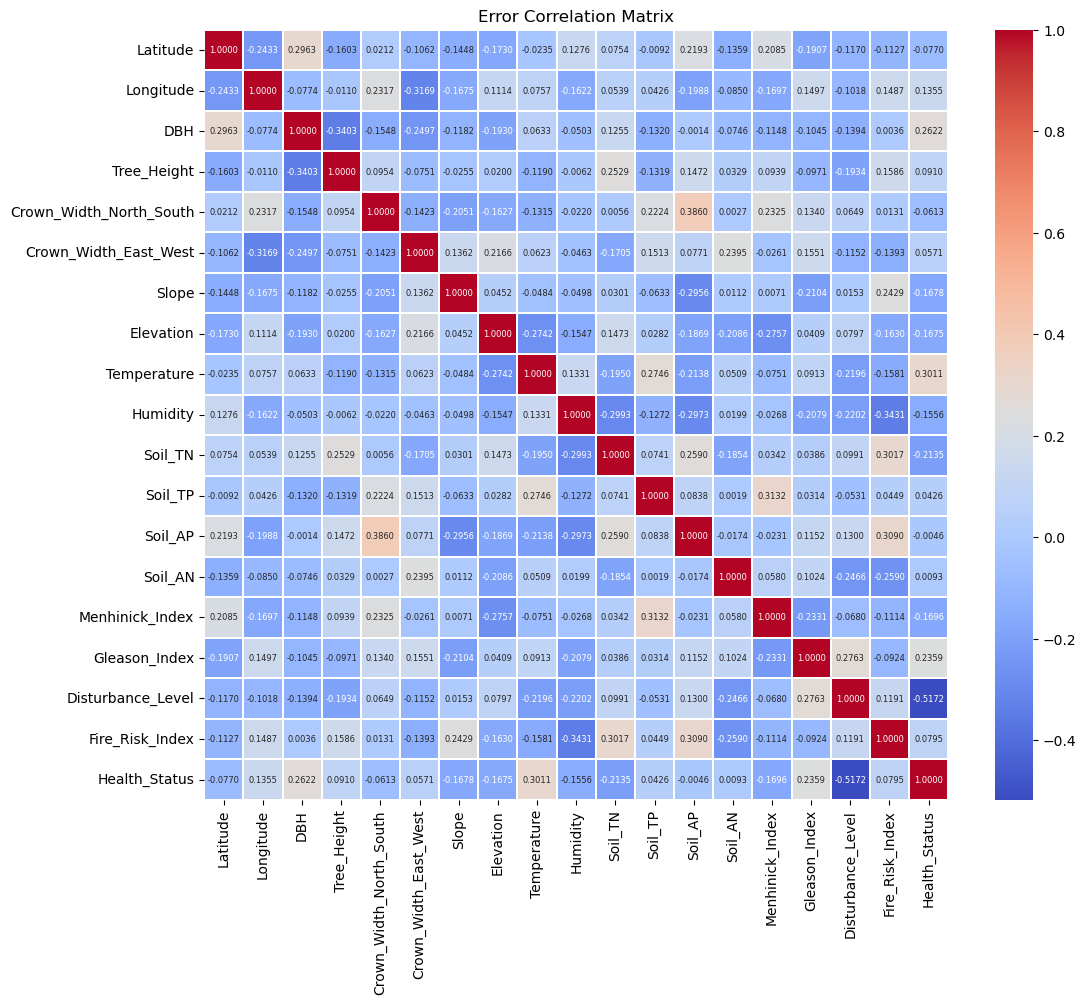

In [ ]:
# Error correlation matrix
correlation_matrix = errores_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.1, fmt=".4f", annot_kws={"size": 6})
plt.title('Error Correlation Matrix')
plt.show()

#### Individual Plots

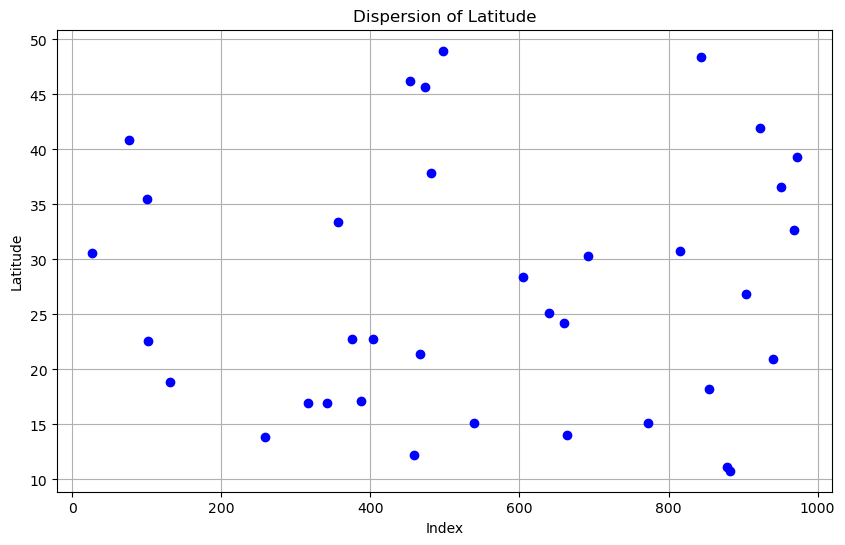

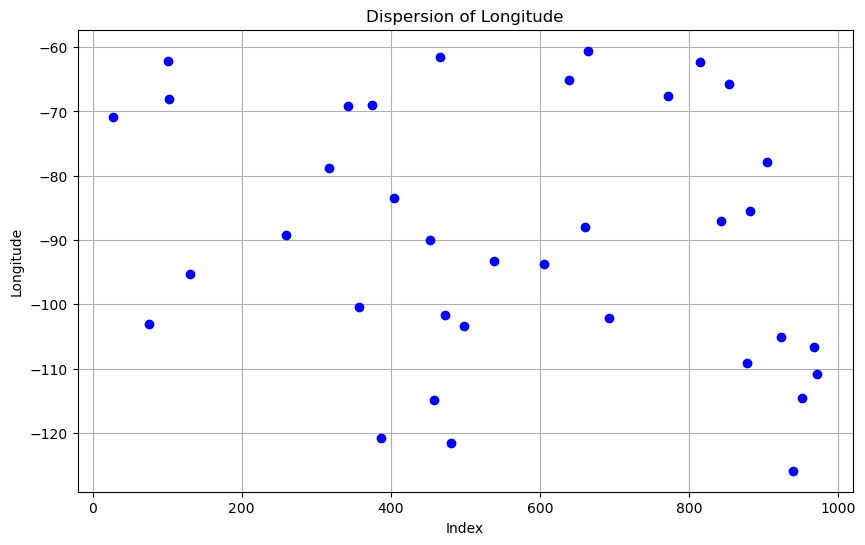

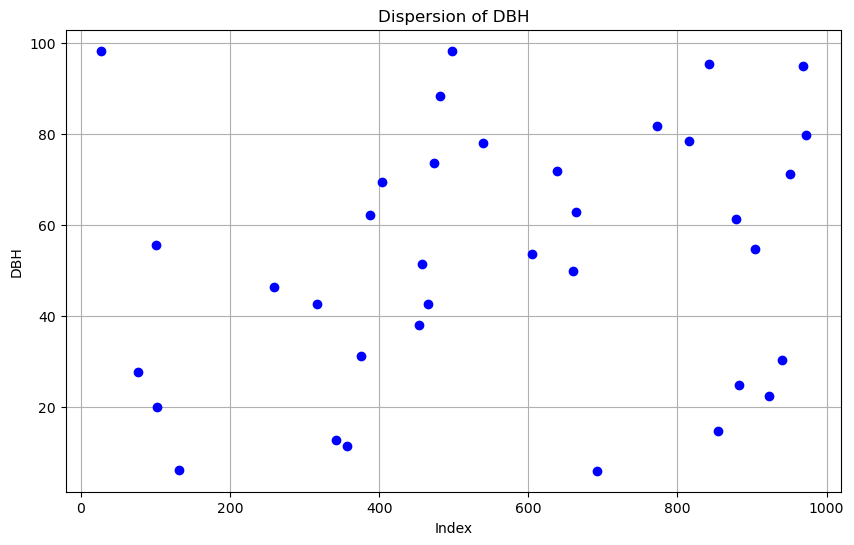

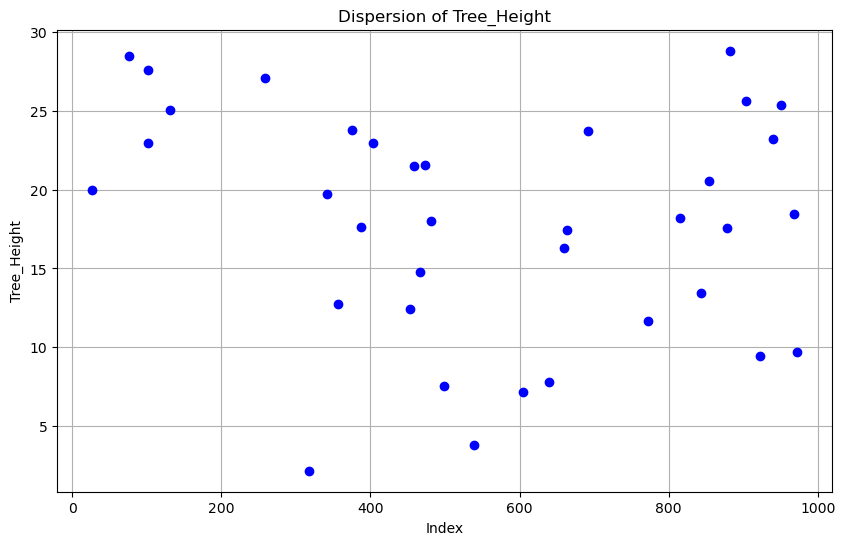

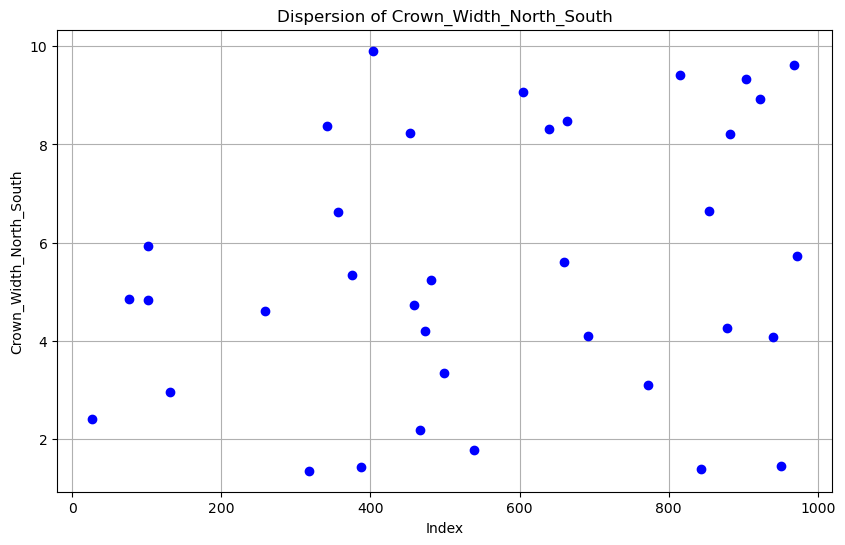

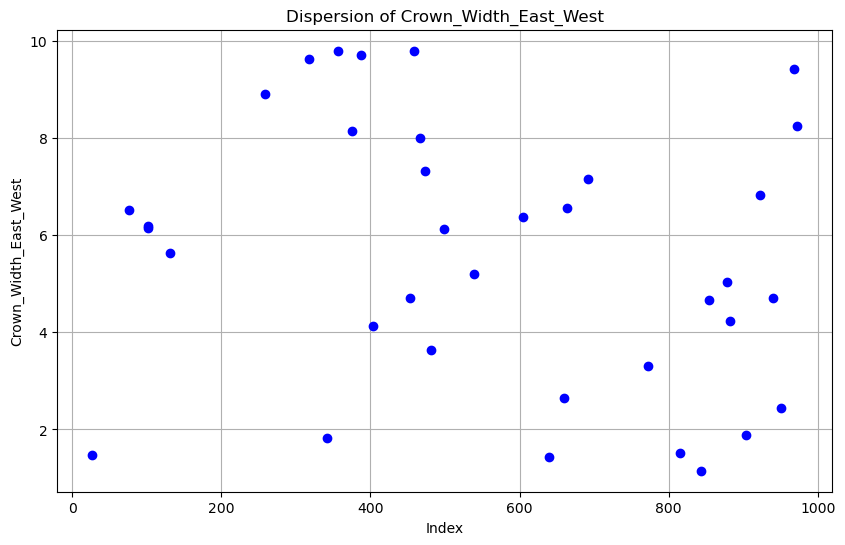

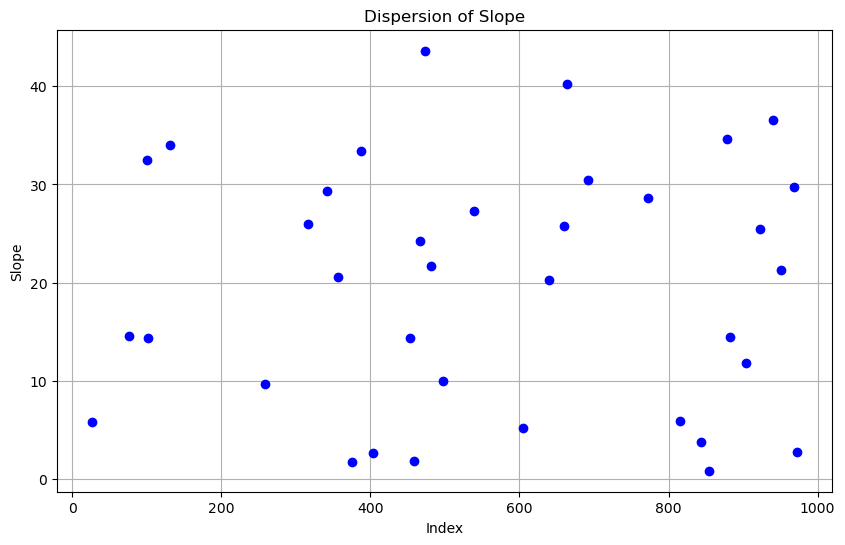

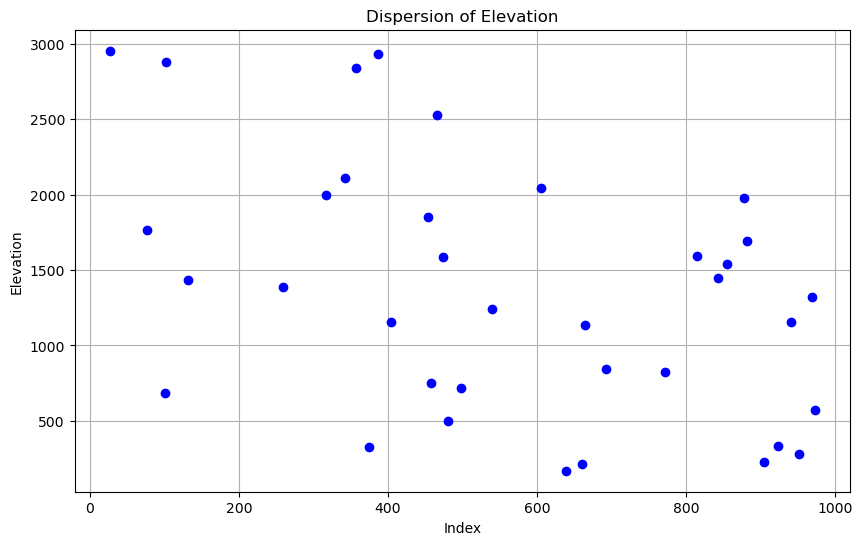

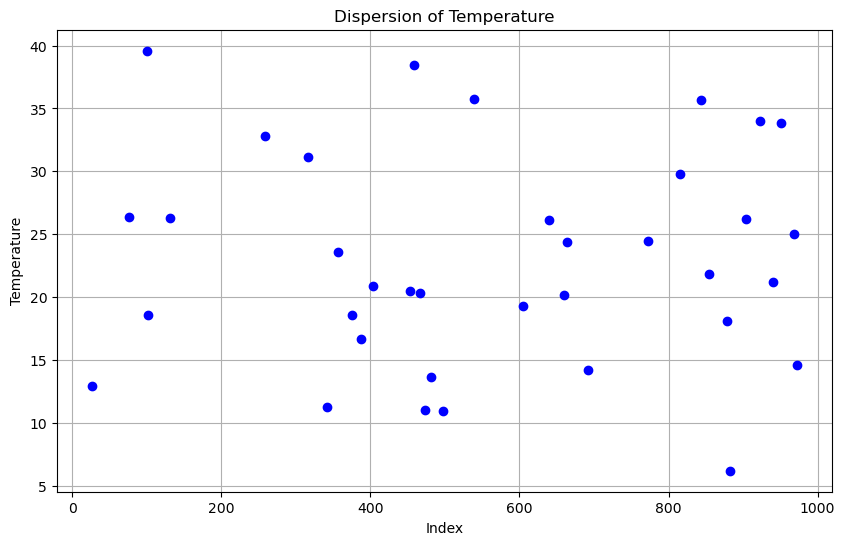

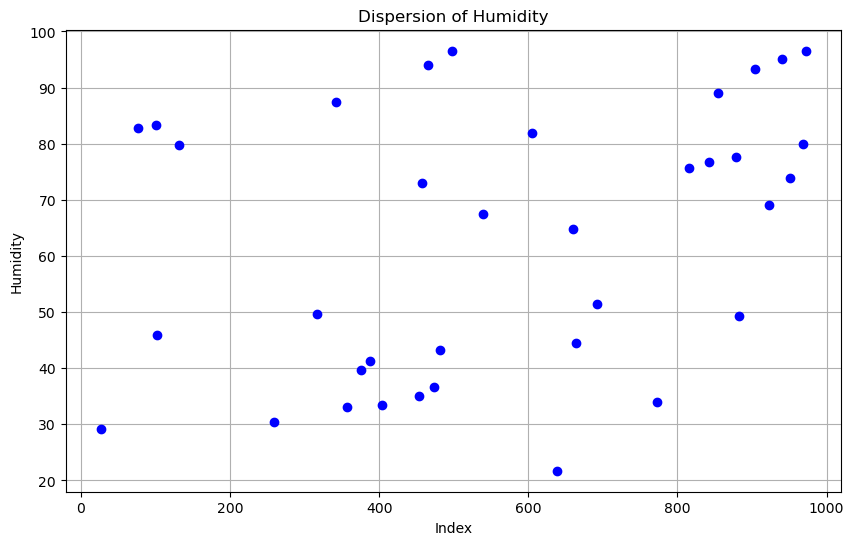

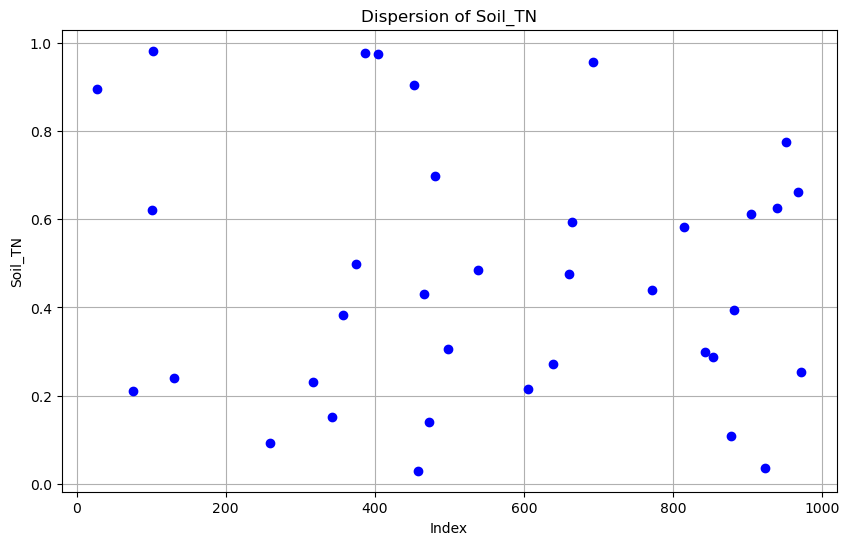

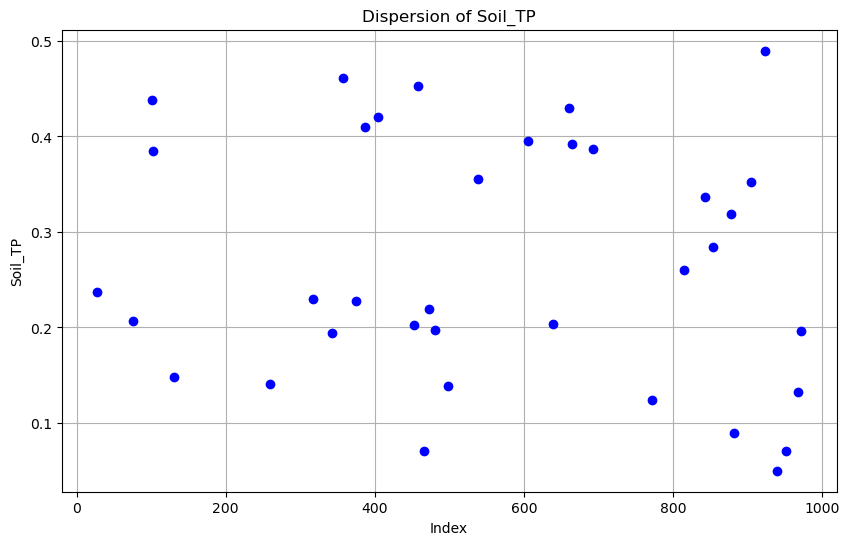

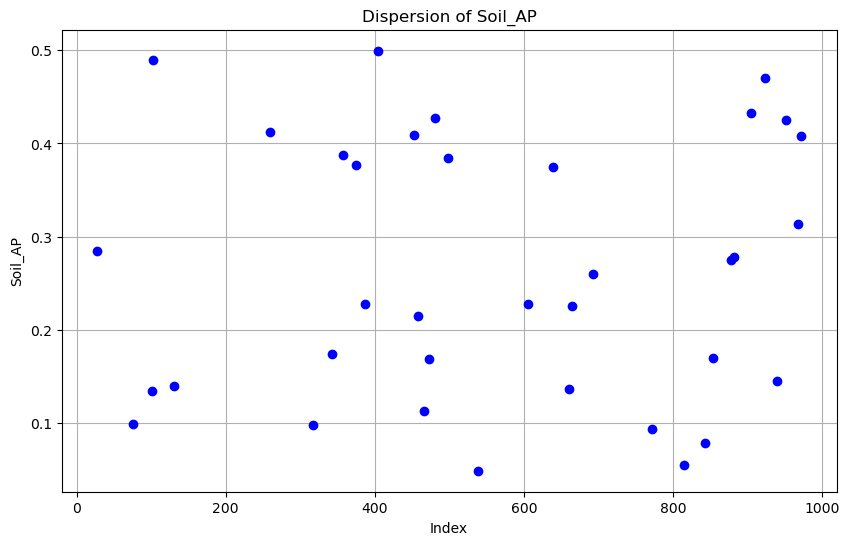

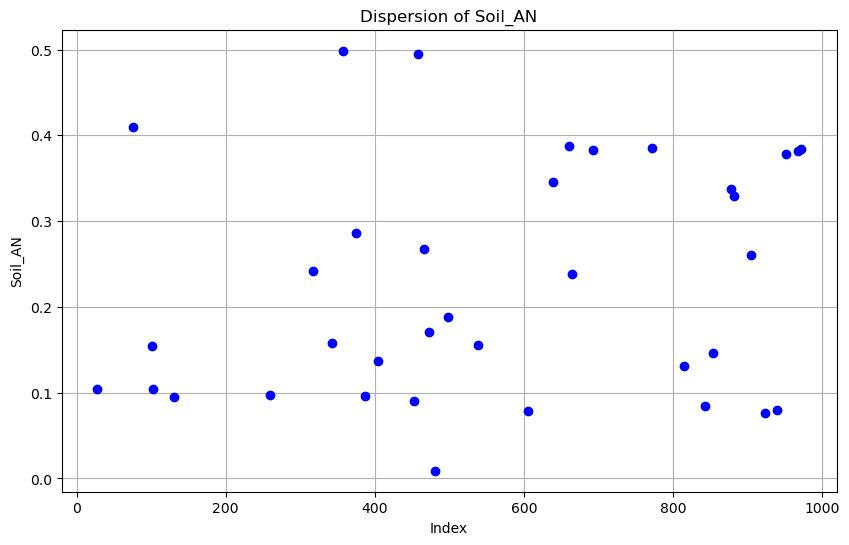

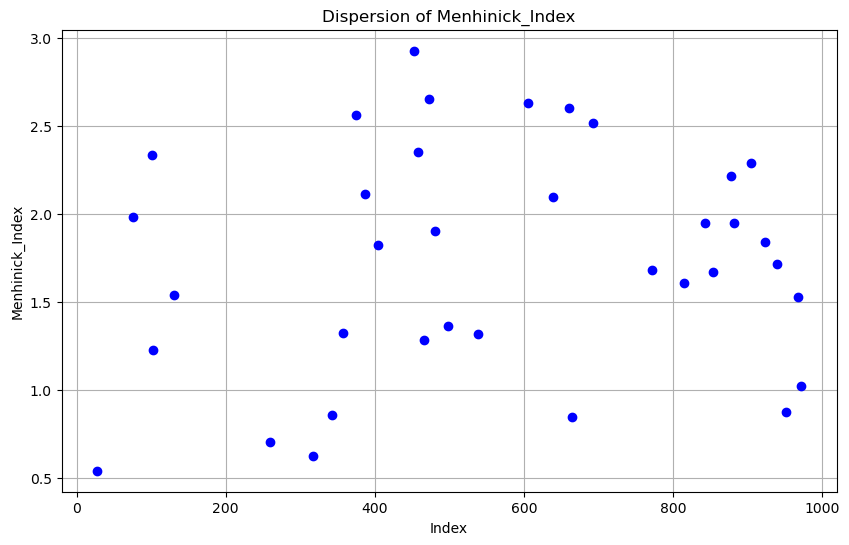

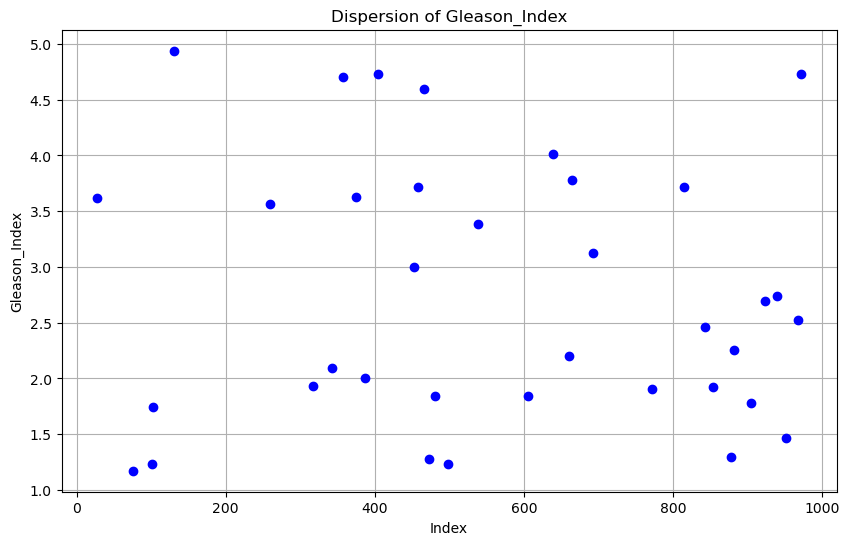

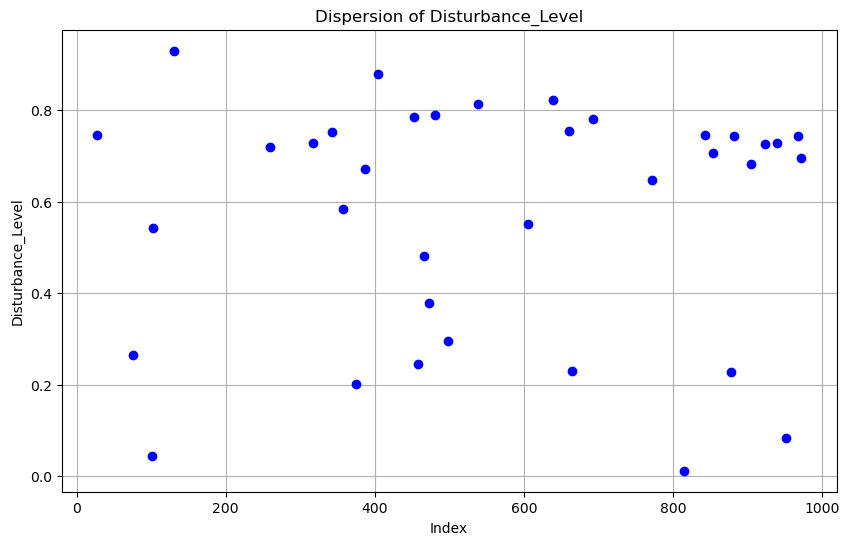

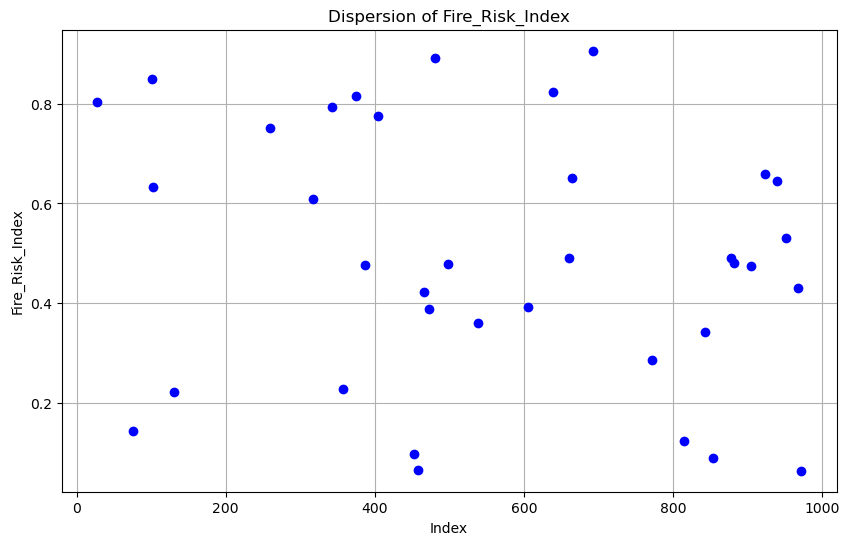

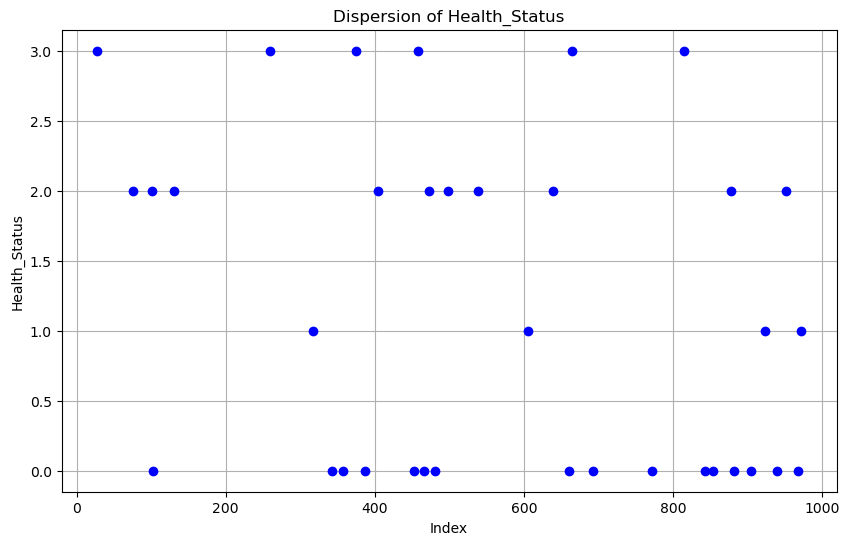

In [ ]:
disperse_errors(errores_df)

#### KMeans

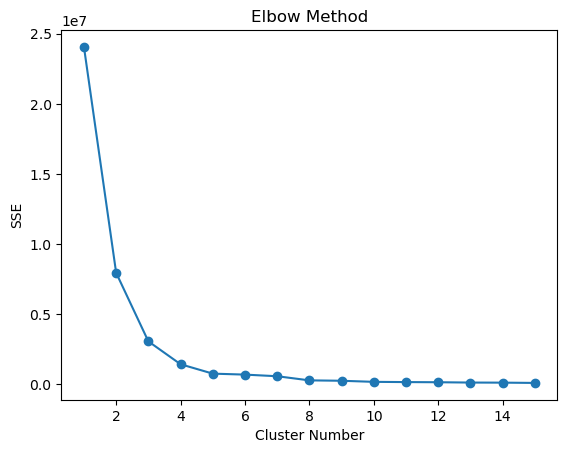

In [ ]:
Xkm = errores_df.drop(columns=['Health_Status'])

# Generate a list of SSE for different K values
sse = []
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Xkm)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 16), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('SSE')
plt.show()

In [ ]:
# k = 3
kmeans = KMeans(n_clusters=3, random_state=42)

# Predict
y_kmeans = kmeans.fit_predict(Xkm)
y_kmeans

array([0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1,
       2, 1, 2, 1, 0, 0, 2, 1, 0, 0, 1, 1, 0, 2])

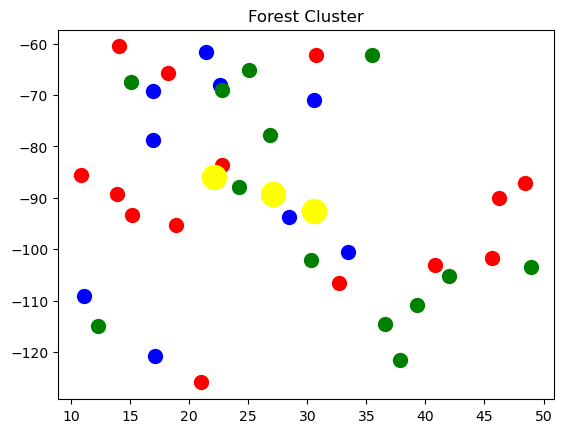

In [ ]:
# Add it to the dataframe as a new column
errores_df['cluster'] = y_kmeans

# Visualize the clusters
plt.scatter(Xkm[y_kmeans==0].iloc[:, 0], Xkm[y_kmeans==0].iloc[:, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(Xkm[y_kmeans==1].iloc[:, 0], Xkm[y_kmeans==1].iloc[:, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(Xkm[y_kmeans==2].iloc[:, 0], Xkm[y_kmeans==2].iloc[:, 1], s=100, c='green', label ='Cluster 3')
# Plot
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Forest Cluster')
plt.show()